In [1]:
import nfl_data_py as nfl, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
draft_picks = nfl.import_draft_picks(range(1995,2011)).reset_index(drop = True)
draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,category,side,college,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,1995,1,1,CIN,None,CartKi00,ki-jana-carter-1,Ki-Jana Carter,False,RB,RB,O,Penn St.,21.0,2004.0,0.0,0.0,0.0,11.0,None,9.0,59.0,0.0,1.0,0.0,0.0,0.0,319.0,1144.0,20.0,66.0,469.0,1.0,1.0,NaN,NaN
1,1995,1,2,JAX,None,BoseTo00,tony-boselli-1,Tony Boselli,True,T,OL,O,USC,23.0,2001.0,3.0,5.0,6.0,66.0,None,66.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
2,1995,1,3,HOU,None,McNaSt00,steve-mcnair-1,Steve McNair,False,QB,QB,O,Alcorn St.,22.0,2007.0,0.0,3.0,10.0,99.0,None,93.0,161.0,2733.0,4544.0,31304.0,174.0,119.0,669.0,3590.0,37.0,1.0,4.0,0.0,NaN,NaN,NaN
3,1995,1,4,WAS,None,WestMi00,michael-westbrook-1,Michael Westbrook,False,WR,WR,O,Colorado,23.0,2002.0,0.0,0.0,6.0,38.0,None,38.0,89.0,0.0,0.0,0.0,0.0,0.0,22.0,160.0,1.0,285.0,4374.0,26.0,NaN,NaN,NaN
4,1995,1,5,CAR,None,CollKe00,kerry-collins-1,Kerry Collins,False,QB,QB,O,Penn St.,22.0,2011.0,0.0,2.0,11.0,83.0,None,14.0,198.0,3487.0,6261.0,40922.0,208.0,196.0,374.0,686.0,10.0,2.0,-13.0,0.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,2010,7,251,OAK,None,BrowSt99,stevie-brown-1,Stevie Brown,False,DB,DB,D,Michigan,23.0,2014.0,0.0,0.0,1.0,10.0,None,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,8.0,1.0
4039,2010,7,252,MIA,None,SpitAu99,austin-spitler-1,Austin Spitler,False,LB,LB,D,Ohio St.,23.0,2013.0,0.0,0.0,0.0,5.0,None,5.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,NaN,NaN
4040,2010,7,253,TAM,None,LoriEr99,erik-lorig-1,Erik Lorig,False,DE,DL,D,Stanford,23.0,2014.0,0.0,0.0,1.0,2.0,None,2.0,66.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,39.0,220.0,2.0,19.0,NaN,NaN
4041,2010,7,254,STL,None,HullJo99,josh-hull-1,Josh Hull,False,LB,LB,D,Penn St.,23.0,2013.0,0.0,0.0,0.0,3.0,None,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN


In [4]:
#extracting draft pick and otc draft values
draft_values = nfl.import_draft_values()[['pick','otc']]
# Creating new index on pick number so I can join this data to the draft picks dataset
draft_values.index = draft_values['pick']
#dropping original pick number column
draft_values = draft_values[['otc']]
draft_values.T

pick,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
otc,3000,2635,2421,2270,2152,2056,1975,1905,1843,1787,1737,1691,1649,1610,1574,1540,1508,1478,1449,1422,1397,1372,1349,1326,1305,1284,1264,1245,1227,1209,1192,1175,1159,1143,1128,1113,1098,1084,1071,1057,1044,1032,1019,1007,995,984,973,961,951,940,929,919,909,899,890,880,871,862,853,844,835,827,818,810,802,794,786,778,770,763,755,748,741,733,726,719,713,706,699,692,686,679,673,667,660,654,648,642,636,630,625,619,613,607,602,596,591,586,580,575,570,564,559,554,549,544,539,534,530,525,520,515,511,506,501,497,492,488,483,479,475,470,466,462,457,453,449,445,441,437,433,429,425,421,417,413,409,405,401,398,394,390,387,383,379,376,372,368,365,361,358,354,351,348,344,341,337,334,331,327,324,321,318,314,311,308,305,302,299,295,292,289,286,283,280,277,274,271,268,265,262,260,257,254,251,248,245,242,240,237,234,231,229,226,223,221,218,215,213,210,207,205,202,199,197,194,192,189,187,184,182,179,177,174,172,169,167,165,162,160,157,155,153,150,148,146,143,141,139,136,134,132,129,127,125,123,121,118,116,114,112,110,107,105,103,101,99,97,94,92,90,88,86,84,82,80,78,76,74,72,70,68


## Joining Pick Values to the Draft Picks Dataset

In [5]:
draft_picks = draft_picks.join(draft_values, on = 'pick', how = 'left')
draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,category,side,college,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks,otc
0,1995,1,1,CIN,None,CartKi00,ki-jana-carter-1,Ki-Jana Carter,False,RB,RB,O,Penn St.,21.0,2004.0,0.0,0.0,0.0,11.0,None,9.0,59.0,0.0,1.0,0.0,0.0,0.0,319.0,1144.0,20.0,66.0,469.0,1.0,1.0,NaN,NaN,3000
1,1995,1,2,JAX,None,BoseTo00,tony-boselli-1,Tony Boselli,True,T,OL,O,USC,23.0,2001.0,3.0,5.0,6.0,66.0,None,66.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2635
2,1995,1,3,HOU,None,McNaSt00,steve-mcnair-1,Steve McNair,False,QB,QB,O,Alcorn St.,22.0,2007.0,0.0,3.0,10.0,99.0,None,93.0,161.0,2733.0,4544.0,31304.0,174.0,119.0,669.0,3590.0,37.0,1.0,4.0,0.0,NaN,NaN,NaN,2421
3,1995,1,4,WAS,None,WestMi00,michael-westbrook-1,Michael Westbrook,False,WR,WR,O,Colorado,23.0,2002.0,0.0,0.0,6.0,38.0,None,38.0,89.0,0.0,0.0,0.0,0.0,0.0,22.0,160.0,1.0,285.0,4374.0,26.0,NaN,NaN,NaN,2270
4,1995,1,5,CAR,None,CollKe00,kerry-collins-1,Kerry Collins,False,QB,QB,O,Penn St.,22.0,2011.0,0.0,2.0,11.0,83.0,None,14.0,198.0,3487.0,6261.0,40922.0,208.0,196.0,374.0,686.0,10.0,2.0,-13.0,0.0,1.0,NaN,NaN,2152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,2010,7,251,OAK,None,BrowSt99,stevie-brown-1,Stevie Brown,False,DB,DB,D,Michigan,23.0,2014.0,0.0,0.0,1.0,10.0,None,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,8.0,1.0,90
4039,2010,7,252,MIA,None,SpitAu99,austin-spitler-1,Austin Spitler,False,LB,LB,D,Ohio St.,23.0,2013.0,0.0,0.0,0.0,5.0,None,5.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,NaN,NaN,88
4040,2010,7,253,TAM,None,LoriEr99,erik-lorig-1,Erik Lorig,False,DE,DL,D,Stanford,23.0,2014.0,0.0,0.0,1.0,2.0,None,2.0,66.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,39.0,220.0,2.0,19.0,NaN,NaN,86
4041,2010,7,254,STL,None,HullJo99,josh-hull-1,Josh Hull,False,LB,LB,D,Penn St.,23.0,2013.0,0.0,0.0,0.0,3.0,None,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,84


# Curve of Pick Value

#### Starts off very steep and then levels out just before the 50th pick in the draft. Suggests that those first few draft picks are especially crucial to any team.

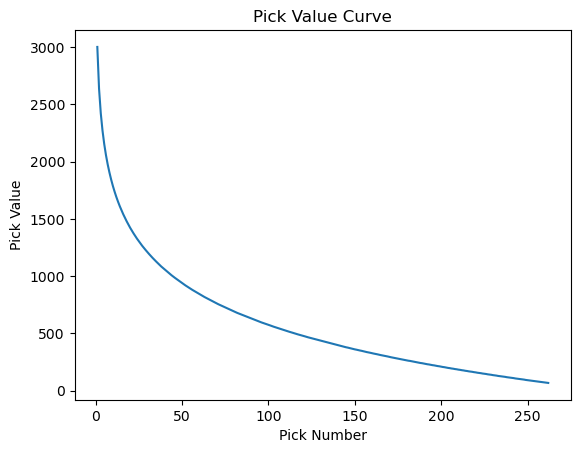

In [6]:
sns.lineplot(draft_values.otc);
plt.xlabel("Pick Number")
plt.ylabel("Pick Value")
plt.title("Pick Value Curve");

### Players who didn't start a game have a wAV value of NA in the dataframe. For the purposes of this study, that's the equivalent of having 0 wAV, as the pick did not benefit the team.

In [7]:
draft_picks['w_av'] = draft_picks.w_av.fillna(0)

In [8]:
draft_picks[['round', 'otc', 'w_av']].groupby('round').describe().T
#Transposed the dataframe since it was easier to read

round                 1            2           3           4           5  \
otc  count   502.000000   504.000000  544.000000  572.000000  565.000000   
     mean   1667.233068   975.301587  693.709559  502.069930  359.233628   
     std     443.187352   104.028901   66.234753   49.026731   38.705772   
     min    1175.000000   802.000000  570.000000  409.000000  283.000000   
     25%    1326.000000   887.500000  636.000000  462.000000  327.000000   
     50%    1540.000000   961.000000  692.000000  501.000000  358.000000   
     75%    1905.000000  1057.000000  748.000000  544.000000  390.000000   
     max    3000.000000  1192.000000  835.000000  613.000000  462.000000   
w_av count   502.000000   504.000000  544.000000  572.000000  565.000000   
     mean     46.264940    28.648810   18.880515   14.963287    9.945133   
     std      31.397705    23.638212   21.512737   18.633258   15.639177   
     min       0.000000     0.000000   -1.000000    0.000000    0.000000   
     25%      23.000000     9.000000    3.000000    1.000000    0.000000   
     50%      41.500000    24.000000   10.000000    8.000000    3.000000   
     75%      64.000000    42.000000   29.000000   22.000000   13.000000   
     max     176.000000   167.000000  121.000000  114.000000  115.000000   

round                6           7  
otc  count  613.000000  743.000000  
     mean   244.419250  137.500673  
     std     34.897732   33.879121  
     min    174.000000   68.000000  
     25%    215.000000  110.000000  
     50%    242.000000  136.000000  
     75%    271.000000  165.000000  
     max    348.000000  237.000000  
w_av count  613.000000  743.000000  
     mean     7.642741    6.415882  
     std     15.165900   12.391877  
     min      0.000000   -2.000000  
     25%      0.000000    0.000000  
     50%      2.000000    1.000000  
     75%      8.000000    7.500000  
     max    184.000000   78.000000

#### Should stratify the first and second rounds since they have the most variance in draft value within the rounds. 

In [9]:
## multiplying by ten to make the data easier to read
draft_picks['w_av/dv'] = draft_picks['w_av'].div(draft_picks['otc'])*10

#### Dividing wAV by Pick Value to see which player brought their team the most relative to their pick cost. Multiplying my ten to make the numbers slightly bigger and thus easier to interpret instead of numbers in the hundreths place.

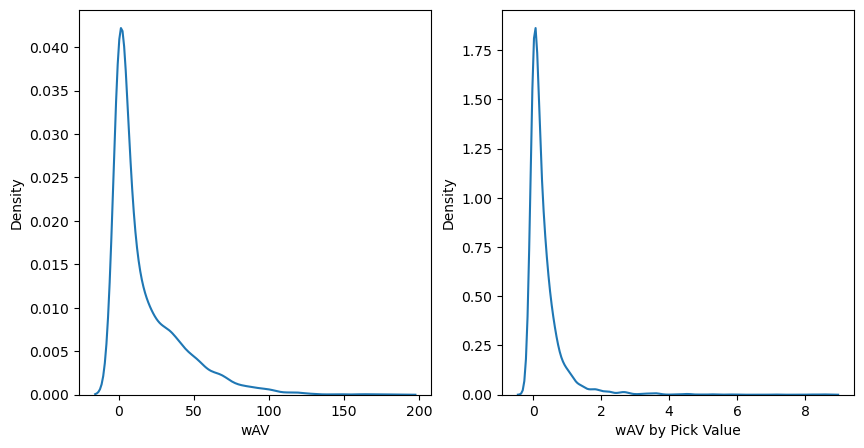

In [10]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.kdeplot(data = draft_picks, x = "w_av")
ax1 = plt.xlabel("wAV")
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.kdeplot(data = draft_picks, x = 'w_av/dv')
ax2 = plt.xlabel("wAV by Pick Value")

#### Both wAV and wAV by Pick Value are skewed heavily to the right, not surprisingly. Probably a better Idea to evaluate their medians instead of their means due to the skewness.

In [11]:
#transposed the data to be easier to read
draft_picks[['round','w_av/dv']].groupby('round').describe().T

round                   1           2           3           4           5  \
w_av/dv count  502.000000  504.000000  544.000000  572.000000  565.000000   
        mean     0.282424    0.293858    0.271470    0.297123    0.275554   
        std      0.191174    0.241151    0.307173    0.371385    0.436387   
        min      0.000000    0.000000   -0.014728    0.000000    0.000000   
        25%      0.140490    0.094321    0.043353    0.021823    0.000000   
        50%      0.260054    0.251497    0.142857    0.151298    0.078329   
        75%      0.385420    0.417290    0.414979    0.441546    0.356164   
        max      1.246106    1.421277    1.902516    2.229581    3.304598   

round                   6           7  
w_av/dv count  613.000000  743.000000  
        mean     0.320748    0.500234  
        std      0.664775    1.027774  
        min      0.000000   -0.118343  
        25%      0.000000    0.000000  
        50%      0.076336    0.060606  
        75%      0.324910    0.526779  
        max      8.638498    8.478261

#### Preliminary analysis suggests that the median outcome of 1st and second round picks result in the biggest bang for their buck for their team. However, all rounds have similar means except for round 7, which is nealry double the means of the rest of the rounds. Also, rounds 6 & 7 have a max wAV by draft value greater than 8.4, which is more than 2x the next highest (round 5) and nearly 8 times as large as the max in round 1. This suggests that if you draft right in these rounds, you will reap massive rewards.

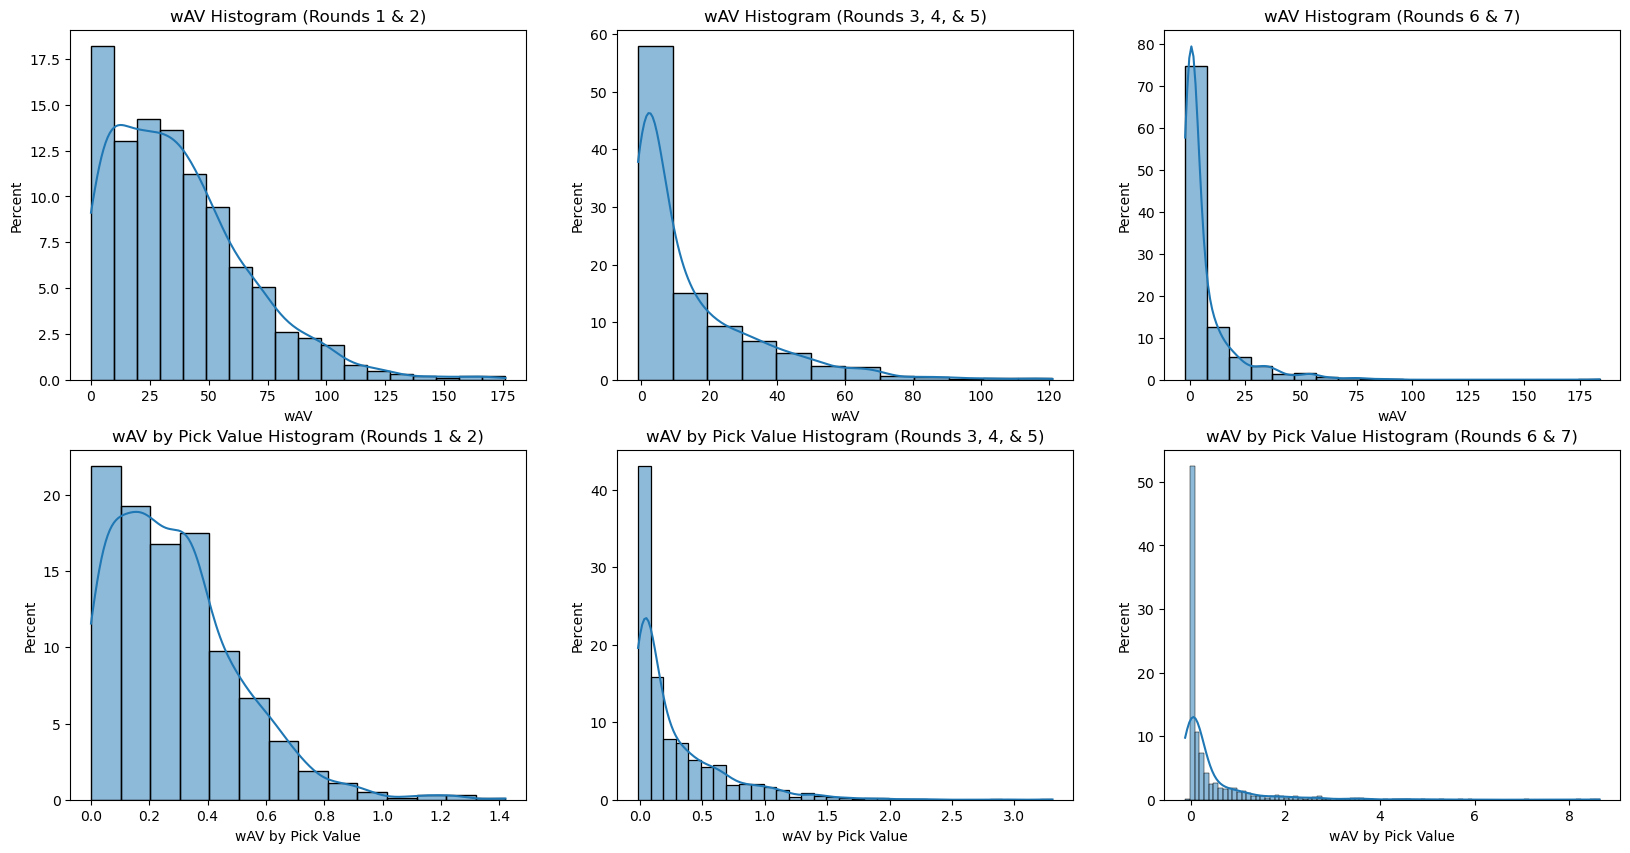

In [12]:
fig = plt.figure(figsize= (20,10))

ax1 = fig.add_subplot(2,3,1)
ax1 = sns.histplot(data = draft_picks[draft_picks['round']<= 2], x = "w_av",binwidth = 10, 
             kde = True, stat = 'percent');
ax1 = plt.xlabel("wAV");
ax1 = plt.title("wAV Histogram (Rounds 1 & 2)")

ax2 = fig.add_subplot(2,3,2)
ax2 = sns.histplot(data = draft_picks[(draft_picks['round']> 2) & (draft_picks['round'] < 6)], x = "w_av",
                   binwidth = 10, kde = True, stat = 'percent');
ax2 = plt.xlabel("wAV");
ax2 = plt.title("wAV Histogram (Rounds 3, 4, & 5)")

ax3 = fig.add_subplot(2,3,3)
ax3 = sns.histplot(data = draft_picks[draft_picks['round']>= 6], x = "w_av",binwidth = 10, 
             kde = True, stat = 'percent');
ax3 = plt.xlabel("wAV");
ax3 = plt.title("wAV Histogram (Rounds 6 & 7)")

ax4 = fig.add_subplot(2,3,4)
ax4 = sns.histplot(data = draft_picks[draft_picks['round']<= 2], x = "w_av/dv",binwidth = 0.1, 
             kde = True, stat = 'percent');
ax4 = plt.xlabel("wAV by Pick Value");
ax4 = plt.title("wAV by Pick Value Histogram (Rounds 1 & 2)")

ax5 = fig.add_subplot(2,3,5)
ax5 = sns.histplot(data = draft_picks[(draft_picks['round']> 2) & (draft_picks['round'] < 6)], x = "w_av/dv",
                   binwidth = 0.1, kde = True, stat = 'percent');
ax5 = plt.xlabel("wAV by Pick Value");
ax5 = plt.title("wAV by Pick Value Histogram (Rounds 3, 4, & 5)")

ax6 = fig.add_subplot(2,3,6)
ax6 = sns.histplot(data = draft_picks[draft_picks['round']>= 6], x = "w_av/dv",binwidth = 0.1, 
             kde = True, stat = 'percent');
ax6 = plt.xlabel("wAV by Pick Value");
ax6 = plt.title("wAV by Pick Value Histogram (Rounds 6 & 7)")

#### A first and second round pick has a much more normal spread of wAV not surprisingly, and you're more likely to get both average players and superstars compared to later draft picks (again, not surprisingly).

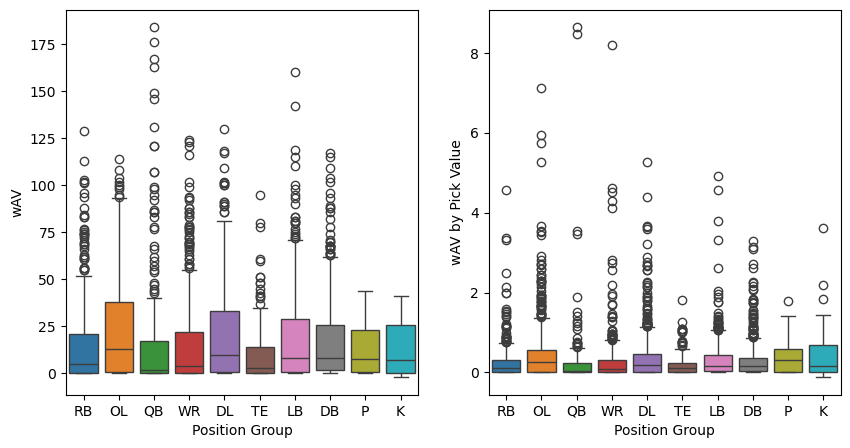

In [13]:
#might make more sense to use median than mean since a lot of the data is skewed
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.boxplot(x = draft_picks.category, y = draft_picks['w_av'], hue = draft_picks.category);
ax1 = plt.xlabel("Position Group")
ax1 = plt.ylabel('wAV');
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.boxplot(x = draft_picks.category, y = draft_picks['w_av/dv'], hue = draft_picks.category);
ax2 = plt.xlabel("Position Group")
ax2 = plt.ylabel('wAV by Pick Value');

#Qb has relatively low w_av/dv funnily enough, however, that could be beacuse the majority of qbs drafted ride
#bench. noatbly, OL and DL have the highest median w_av/dv

#### QBs seem to have the lowest median wAV and wAV by Pick Value, however, they also have the biggest outliers in the data. This could be because each team only starts one QB a season (if none get hurt), which means that most of them ride the bench and don't accumulate any wAV while other positions can start multiple players at each position. Another thing that's notable is that both OL and DL have the highest median wAV and wAV by Pick Value.

In [14]:
draft_picks[['otc', 'w_av/dv', 'w_av','pick','round','games','seasons_started','age']].corr()

,otc,w_av/dv,w_av,pick,round,games,seasons_started,age
otc,1.000000,-0.076253,0.554158,-0.883312,-0.881769,0.406884,0.543015,-0.221465
w_av/dv,-0.076253,1.000000,0.537145,0.113981,0.100476,0.512218,0.486713,-0.050780
w_av,0.554158,0.537145,1.000000,-0.493157,-0.496745,0.838124,0.924114,-0.211174
pick,-0.883312,0.113981,-0.493157,1.000000,0.986718,-0.391957,-0.493891,0.203308
round,-0.881769,0.100476,-0.496745,0.986718,1.000000,-0.393685,-0.497073,0.205770
games,0.406884,0.512218,0.838124,-0.391957,-0.393685,1.000000,0.826337,-0.183935
seasons_started,0.543015,0.486713,0.924114,-0.493891,-0.497073,0.826337,1.000000,-0.193113
age,-0.221465,-0.050780,-0.211174,0.203308,0.205770,-0.183935,-0.193113,1.000000


#### Interestingly, draft age doesn't seem to be correlated with either seasons started nor games played. This suggests that it's not worth choosing one player over the other just because one is younger, since the majority of players drafted don't end up panning out anyways. Also interesting is that wAV is heavily correlated to both games and seasons started but wAV by pick value is less correlated to both. I wonder if this insinuates that players drafted higher tend to be given more playing time regardless of their performance in hopes they turn it around (perhaps something to look into another time). 

# Stratifying the First and Second Rounds

In [15]:
## creating for loop for stratifying early rounds

draft_picks['round_type'] = draft_picks['round'].astype("string")
for idx, row in draft_picks.iterrows():
    if row['round'] == 1:
        if row['pick'] <= 10:
            draft_picks.at[idx,'round_type'] = "Top Ten Pick"
        elif 10 < row['pick'] < 21:
            draft_picks.at[idx,'round_type'] = "Mid First Round"
        else:
            draft_picks.at[idx,'round_type'] = "Late First Round"
    elif row['round'] == 2:
        if row['pick'] <= 48:
            draft_picks.at[idx,'round_type'] = "Early Second Round"
        else:
            draft_picks.at[idx,'round_type'] = "Late Second Round"

draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,category,side,college,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks,otc,w_av/dv,round_type
0,1995,1,1,CIN,None,CartKi00,ki-jana-carter-1,Ki-Jana Carter,False,RB,RB,O,Penn St.,21.0,2004.0,0.0,0.0,0.0,11.0,None,9.0,59.0,0.0,1.0,0.0,0.0,0.0,319.0,1144.0,20.0,66.0,469.0,1.0,1.0,NaN,NaN,3000,0.036667,Top Ten Pick
1,1995,1,2,JAX,None,BoseTo00,tony-boselli-1,Tony Boselli,True,T,OL,O,USC,23.0,2001.0,3.0,5.0,6.0,66.0,None,66.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2635,0.250474,Top Ten Pick
2,1995,1,3,HOU,None,McNaSt00,steve-mcnair-1,Steve McNair,False,QB,QB,O,Alcorn St.,22.0,2007.0,0.0,3.0,10.0,99.0,None,93.0,161.0,2733.0,4544.0,31304.0,174.0,119.0,669.0,3590.0,37.0,1.0,4.0,0.0,NaN,NaN,NaN,2421,0.408922,Top Ten Pick
3,1995,1,4,WAS,None,WestMi00,michael-westbrook-1,Michael Westbrook,False,WR,WR,O,Colorado,23.0,2002.0,0.0,0.0,6.0,38.0,None,38.0,89.0,0.0,0.0,0.0,0.0,0.0,22.0,160.0,1.0,285.0,4374.0,26.0,NaN,NaN,NaN,2270,0.167401,Top Ten Pick
4,1995,1,5,CAR,None,CollKe00,kerry-collins-1,Kerry Collins,False,QB,QB,O,Penn St.,22.0,2011.0,0.0,2.0,11.0,83.0,None,14.0,198.0,3487.0,6261.0,40922.0,208.0,196.0,374.0,686.0,10.0,2.0,-13.0,0.0,1.0,NaN,NaN,2152,0.385688,Top Ten Pick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,2010,7,251,OAK,None,BrowSt99,stevie-brown-1,Stevie Brown,False,DB,DB,D,Michigan,23.0,2014.0,0.0,0.0,1.0,10.0,None,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,8.0,1.0,90,1.111111,7
4039,2010,7,252,MIA,None,SpitAu99,austin-spitler-1,Austin Spitler,False,LB,LB,D,Ohio St.,23.0,2013.0,0.0,0.0,0.0,5.0,None,5.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,NaN,NaN,88,0.568182,7
4040,2010,7,253,TAM,None,LoriEr99,erik-lorig-1,Erik Lorig,False,DE,DL,D,Stanford,23.0,2014.0,0.0,0.0,1.0,2.0,None,2.0,66.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,39.0,220.0,2.0,19.0,NaN,NaN,86,0.232558,7
4041,2010,7,254,STL,None,HullJo99,josh-hull-1,Josh Hull,False,LB,LB,D,Penn St.,23.0,2013.0,0.0,0.0,0.0,3.0,None,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,84,0.357143,7


# Summary Stats using the Newly Created Stratified Rounds

In [16]:
draft_picks['round_type'] = pd.Categorical(draft_picks['round_type'], categories= ['Top Ten Pick', 'Mid First Round',
                                                                                  'Late First Round', 'Early Second Round',
                                                                                  'Late Second Round', '3', '4', '5','6',
                                                                                  '7'], ordered=True)


draft_picks[['round_type','w_av/dv']].groupby('round_type', observed = False).describe().T

round_type     Top Ten Pick  Mid First Round  Late First Round  \
w_av/dv count    160.000000       160.000000        182.000000   
        mean       0.249520         0.298682          0.297058   
        std        0.149417         0.171418          0.233091   
        min        0.003795         0.012706          0.000000   
        25%        0.140915         0.155400          0.114310   
        50%        0.231921         0.281695          0.275056   
        75%        0.346815         0.435490          0.403282   
        max        0.656388         0.848861          1.246106   

round_type     Early Second Round  Late Second Round           3           4  \
w_av/dv count          266.000000         238.000000  544.000000  572.000000   
        mean             0.291387           0.296620    0.271470    0.297123   
        std              0.225320           0.258150    0.307173    0.371385   
        min              0.000000           0.000000   -0.014728    0.000000   
        25%              0.101626           0.084854    0.043353    0.021823   
        50%              0.260932           0.241931    0.142857    0.151298   
        75%              0.408853           0.449818    0.414979    0.441546   
        max              1.421277           1.245509    1.902516    2.229581   

round_type              5           6           7  
w_av/dv count  565.000000  613.000000  743.000000  
        mean     0.275554    0.320748    0.500234  
        std      0.436387    0.664775    1.027774  
        min      0.000000    0.000000   -0.118343  
        25%      0.000000    0.000000    0.000000  
        50%      0.078329    0.076336    0.060606  
        75%      0.356164    0.324910    0.526779  
        max      3.304598    8.638498    8.478261

#### There's a clear difference in the premium between a top ten pick and a late First Rounder, suggesting that players taken in the late first round may not be much worse than early first rounders like the draft values approximation suggests. Or, it could mean that teams that don't draft QBs in the top ten should be picking there. According to football-reference, 6 of the top ten in career wAV are QBs which shouldn't be surprising since QBs are the most valuable player on a football team. 

# Scatterplot of wAV by Pick Number by Side of Ball (Offense, Defense, Special Teams)

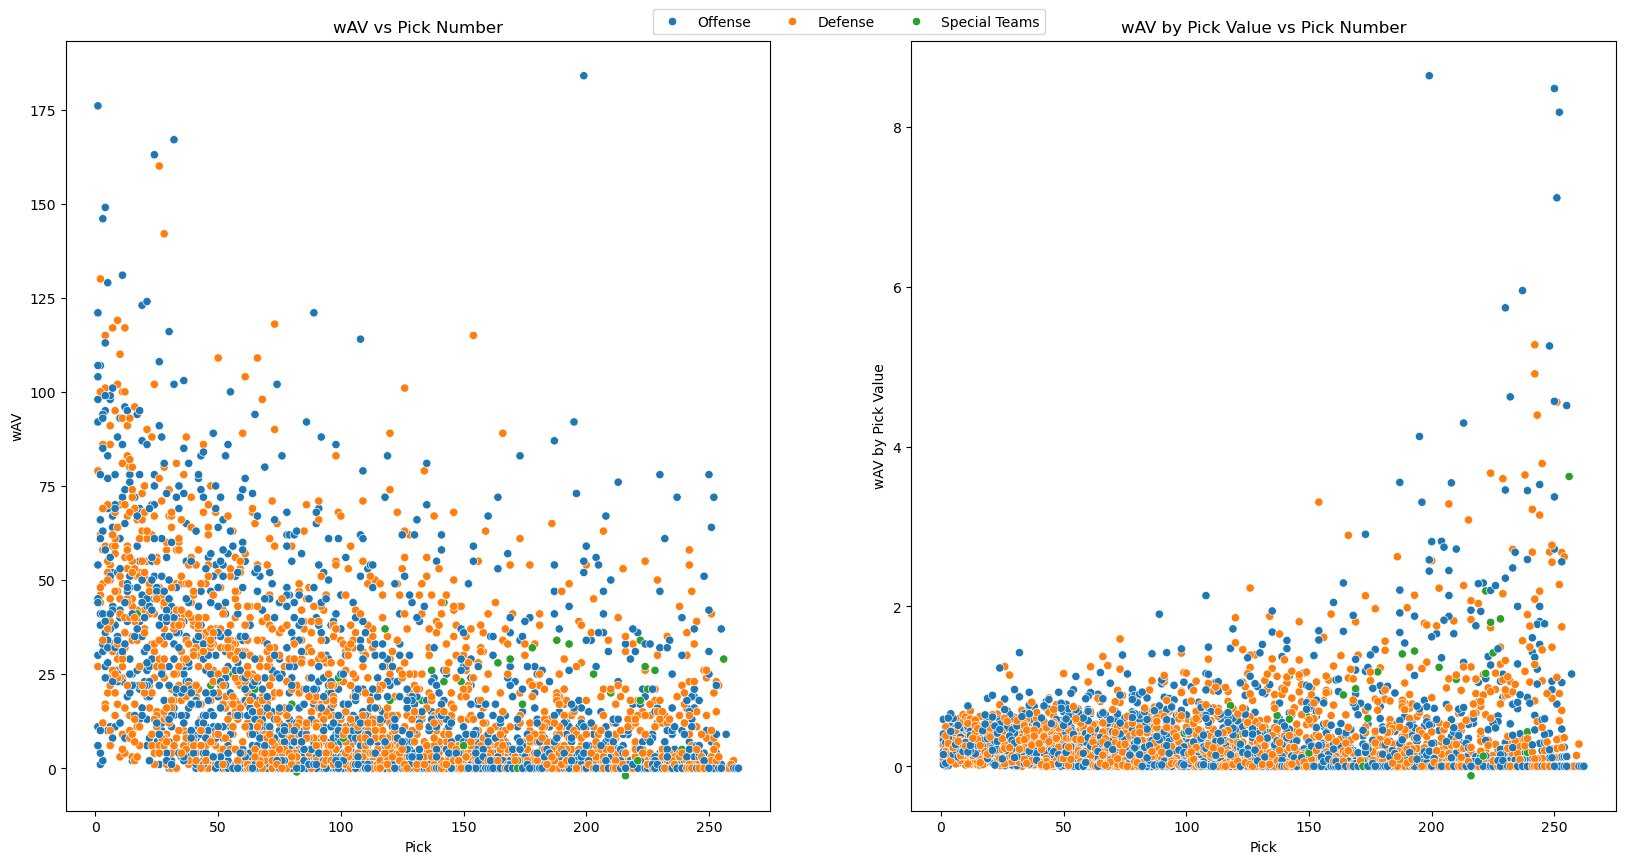

In [17]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,2)
ax1 = sns.scatterplot(data = draft_picks, x = 'pick', y = "w_av/dv", hue = 'side', legend = None);
ax1 = plt.xlabel("Pick")
ax1 = plt.ylabel("wAV by Pick Value")
ax1 = plt.title("wAV by Pick Value vs Pick Number")
ax2 = fig.add_subplot(1,2,1)
ax2 = sns.scatterplot(data = draft_picks, x = 'pick', y = "w_av", hue = 'side');
handles, labels = ax2.get_legend_handles_labels()
label_dict = {"O": "Offense", 'D': 'Defense', 'S': 'Special Teams'}
final_labels = [label_dict[label] for label in labels]
plt.legend(handles, final_labels, bbox_to_anchor = (1.4,1.05), ncol = 3);
ax2 = plt.xlabel("Pick")
ax2 = plt.ylabel("wAV")
ax2 = plt.title("wAV vs Pick Number")

#### Looking at the outliers, offensive draft picks seem to outperform defensive picks in both wAV and wAV by Pick Value. However, These could be QBs causing the graph to look this way.

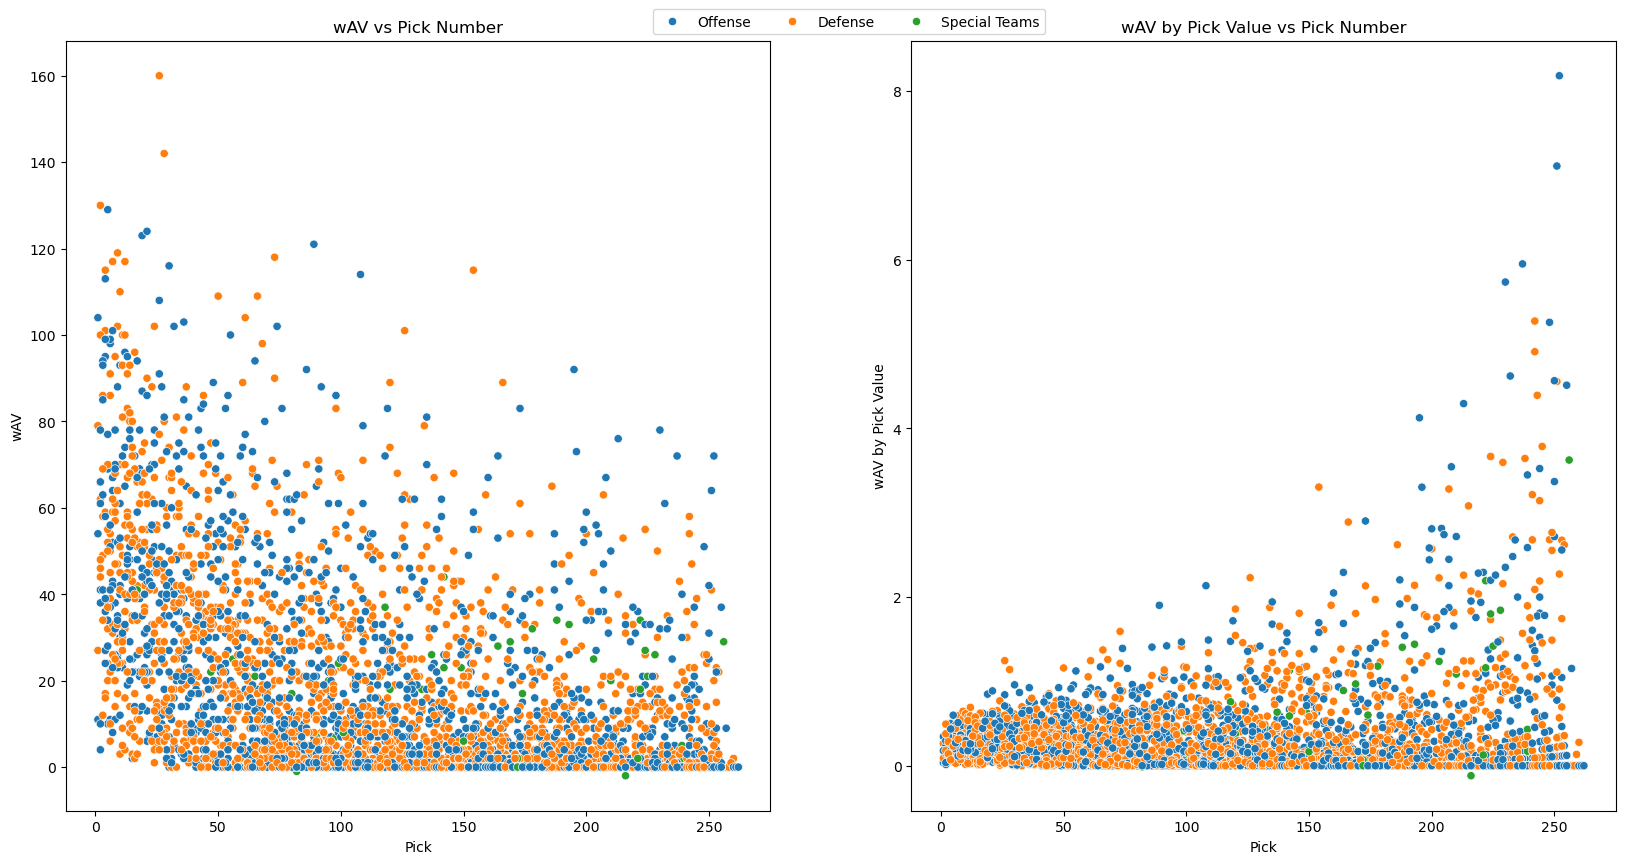

In [18]:
#Removing QBs
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,2)
ax1 = sns.scatterplot(data = draft_picks[draft_picks['position'] != "QB"], x = 'pick', y = "w_av/dv", hue = 'side', legend = None);
ax1 = plt.xlabel("Pick")
ax1 = plt.ylabel("wAV by Pick Value")
ax1 = plt.title("wAV by Pick Value vs Pick Number")
ax2 = fig.add_subplot(1,2,1)
ax2 = sns.scatterplot(data = draft_picks[draft_picks['position'] != "QB"], x = 'pick', y = "w_av", hue = 'side');
handles, labels = ax2.get_legend_handles_labels()
label_dict = {"O": "Offense", 'D': 'Defense', 'S': 'Special Teams'}
final_labels = [label_dict[label] for label in labels]
plt.legend(handles, final_labels, bbox_to_anchor = (1.4,1.05), ncol = 3);
ax2 = plt.xlabel("Pick")
ax2 = plt.ylabel("wAV")
ax2 = plt.title("wAV vs Pick Number")

#### After removing QBs from the dataset, it actually looks like defensive players might be more likely to accumulate the most wAV, especially in the early rounds. However, in rounds 6 & 7, offensive players are more likely to be outliers and provide their team with the most value relative to their pick value.  

# Bar Graph Comparing Mean wAV by Pick Value to Median wAV by Pick Value

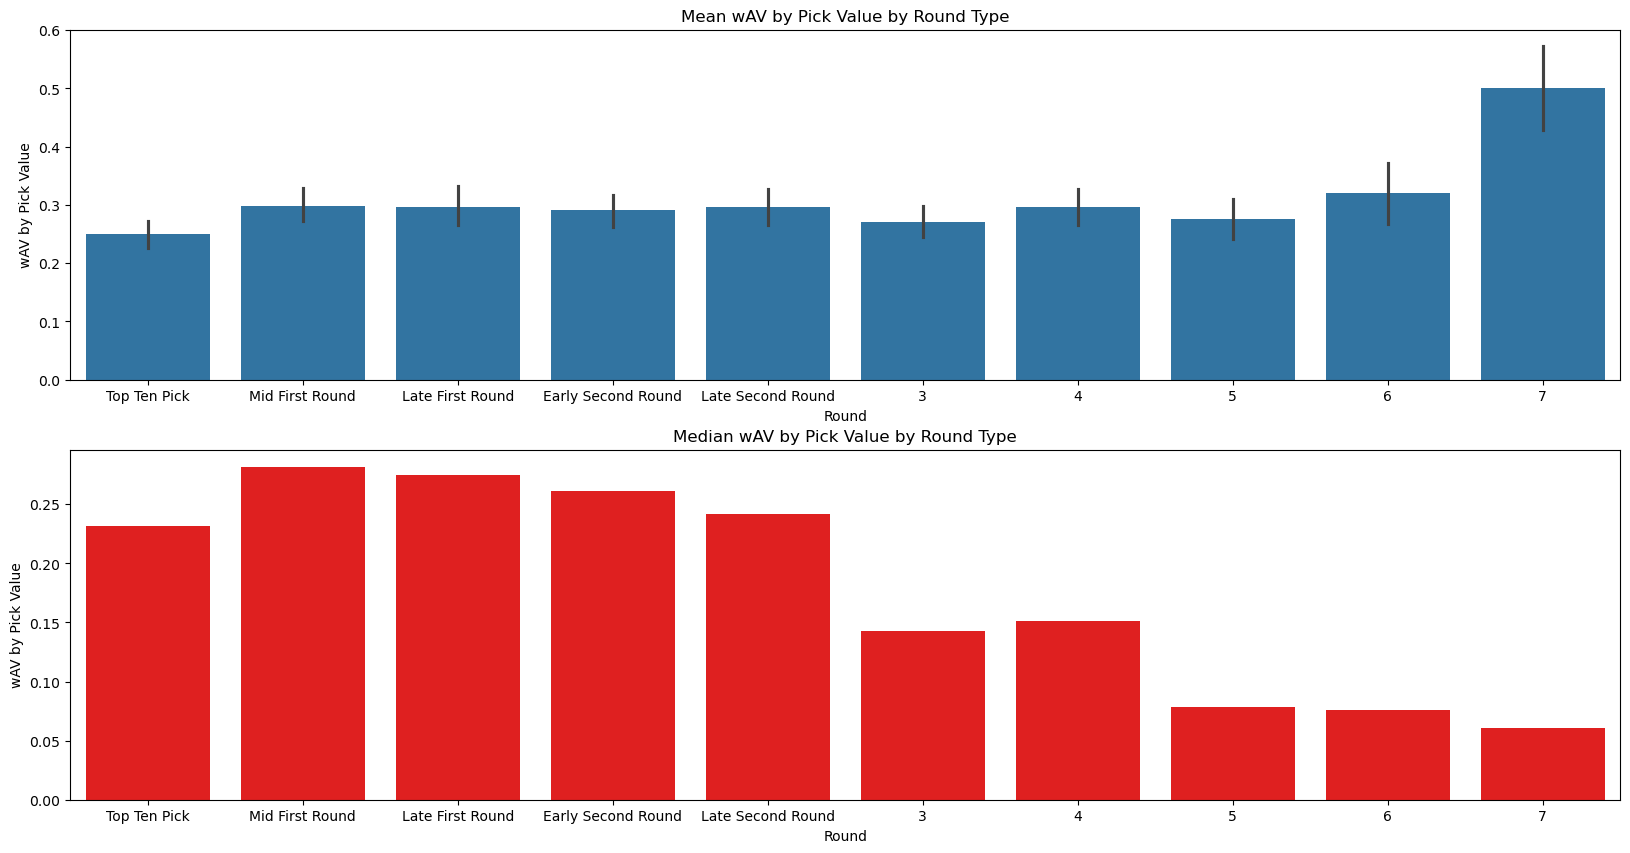

In [19]:
fig = plt.figure(figsize = (20,10))
#Mean
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.barplot(data = draft_picks, x = "round_type", y = "w_av/dv");
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV by Pick Value")
ax1 = plt.title("Mean wAV by Pick Value by Round Type")
#Median
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(data = draft_picks, x = "round_type", y = "w_av/dv",
                  estimator = np.median, errorbar = ('ci', False), color = 'r');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("Median wAV by Pick Value by Round Type")

#### This confirms what we observed before. In the later rounds, you may be able to snag a player at an extreme premium. However, The first and second rounds are more likley to yield better outcomes on average. It also suggests that the draft values are too high on the top ten picks as well as the final 5 rounds of the draft. The wAV values by Pick Value should show a roughly uniform distribution by round. However, there's a clear drop off after round 2.

# Bar Graph Comparing Mean wAV by Pick Value to Median wAV by Pick Value By Side of Ball

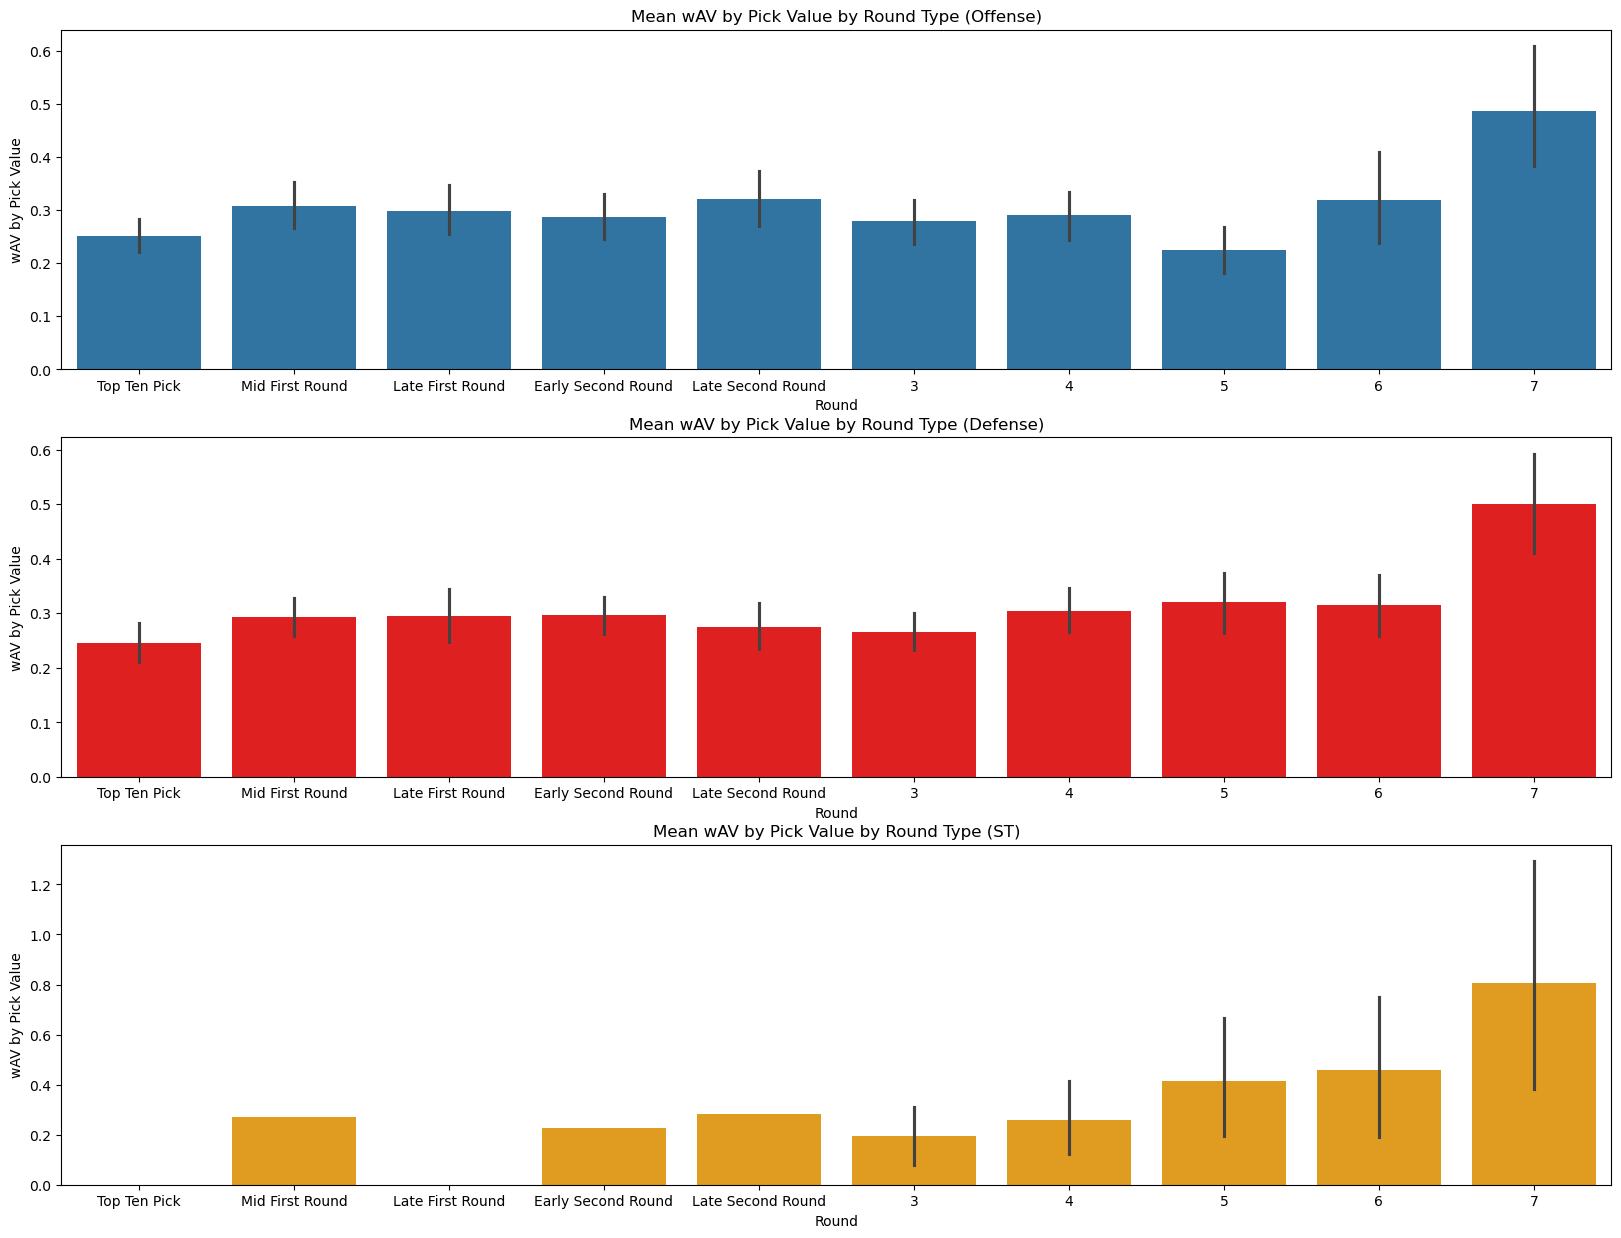

In [20]:
offense = draft_picks[draft_picks['side'] == "O"]
defense = draft_picks[draft_picks['side'] == "D"]
ST = draft_picks[draft_picks['side'] == "S"]

#Offense
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(3,1,1)
ax1 = sns.barplot(data = offense, x = "round_type", y = "w_av/dv");
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV by Pick Value")
ax1 = plt.title("Mean wAV by Pick Value by Round Type (Offense)")
#Defense
ax2 = fig.add_subplot(3,1,2)
ax2 = sns.barplot(data = defense, x = "round_type", y = "w_av/dv", color = 'red');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("Mean wAV by Pick Value by Round Type (Defense)")
#Special Teams
ax3 = fig.add_subplot(3,1,3)
ax3 = sns.barplot(data = ST, x = "round_type", y = "w_av/dv", color = 'orange');
ax3 = plt.xlabel("Round")
ax3 = plt.ylabel("wAV by Pick Value")
ax3 = plt.title("Mean wAV by Pick Value by Round Type (ST)")

#### Mean wAV by Pick Value are similar between both offensive and defensive players. Special Teams does show a higher wAV by pick value in the later rounds. However, that's probably because the best ST options are still available in the final rounds and the ST data is very noisy (hence the extremly large error bars). Also, the majority of ST players are signed as undrafted FA, so it's hard to evaluate the graph without those players included.

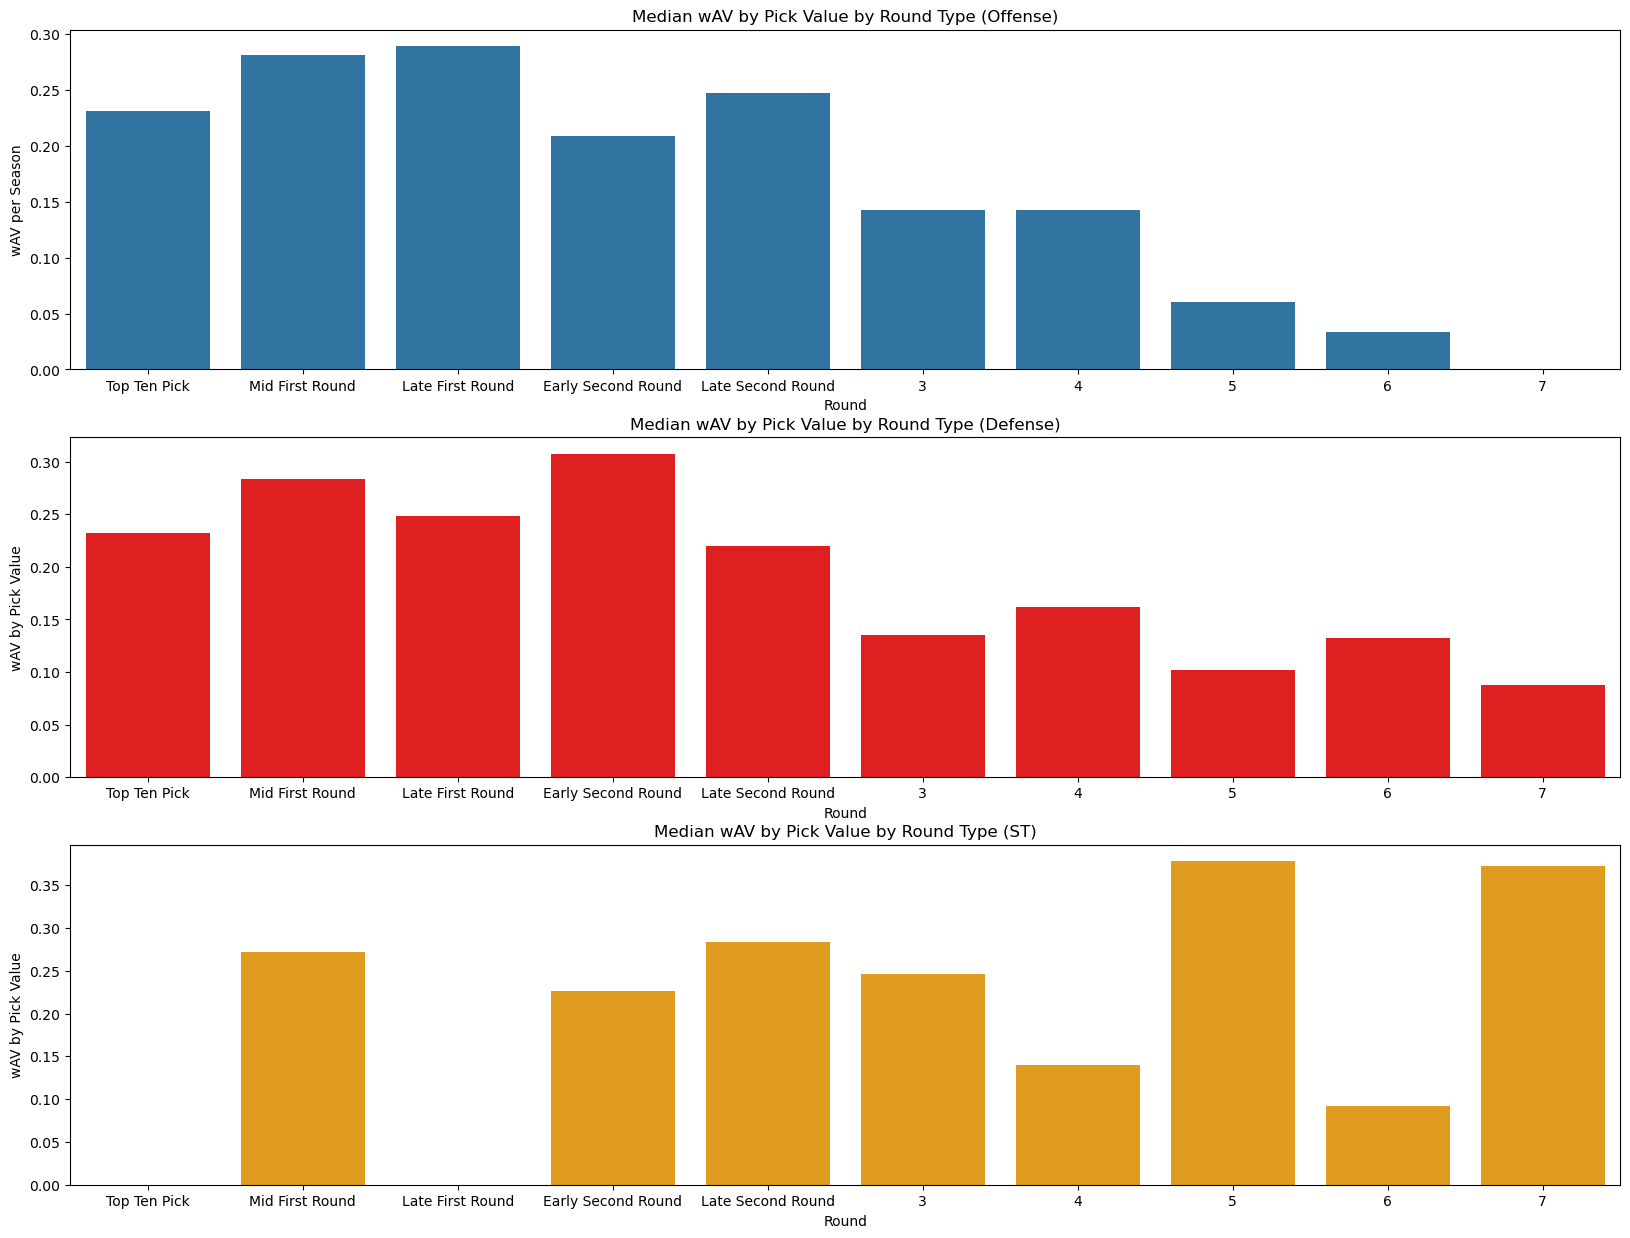

In [21]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(3,1,1)
ax1 = sns.barplot(data = offense, x = "round_type", y = "w_av/dv", estimator = np.median,
                 errorbar = ('ci', False));
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV per Season")
ax1 = plt.title("Median wAV by Pick Value by Round Type (Offense)")
ax2 = fig.add_subplot(3,1,2)
ax2 = sns.barplot(data = defense, x = "round_type", y = "w_av/dv", estimator = np.median,
                 errorbar = ('ci', False), color = 'r');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("Median wAV by Pick Value by Round Type (Defense)")

ax3 = fig.add_subplot(3,1,3)
ax3 = sns.barplot(data = ST, x = "round_type", y = "w_av/dv", estimator = np.median,
                 errorbar = ('ci', False), color = 'orange');
ax3 = plt.xlabel("Round")
ax3 = plt.ylabel("wAV by Pick Value")
ax3 = plt.title("Median wAV by Pick Value by Round Type (ST)")

#### In the early rounds, it seems like a better idea to take offensive players to get the most bang for your buck. However, in the later rounds, defensive players seem to be the better investment, especially in rounds 5, 6, & 7.

In [22]:
#changing NT to DT since there are only 4 observations for NT
for idx, row in draft_picks.iterrows():
    if row['position'] == 'NT':
        draft_picks.at[idx, 'position'] = "DT"

In [23]:
#subseting each position into it's own dataframe
positions = {}
for position in draft_picks['position'].unique():
    positions[position] = draft_picks[draft_picks['position'] == position]


# Bar Graphs of Median wAV by Pick Value for Offensive Skill Positions

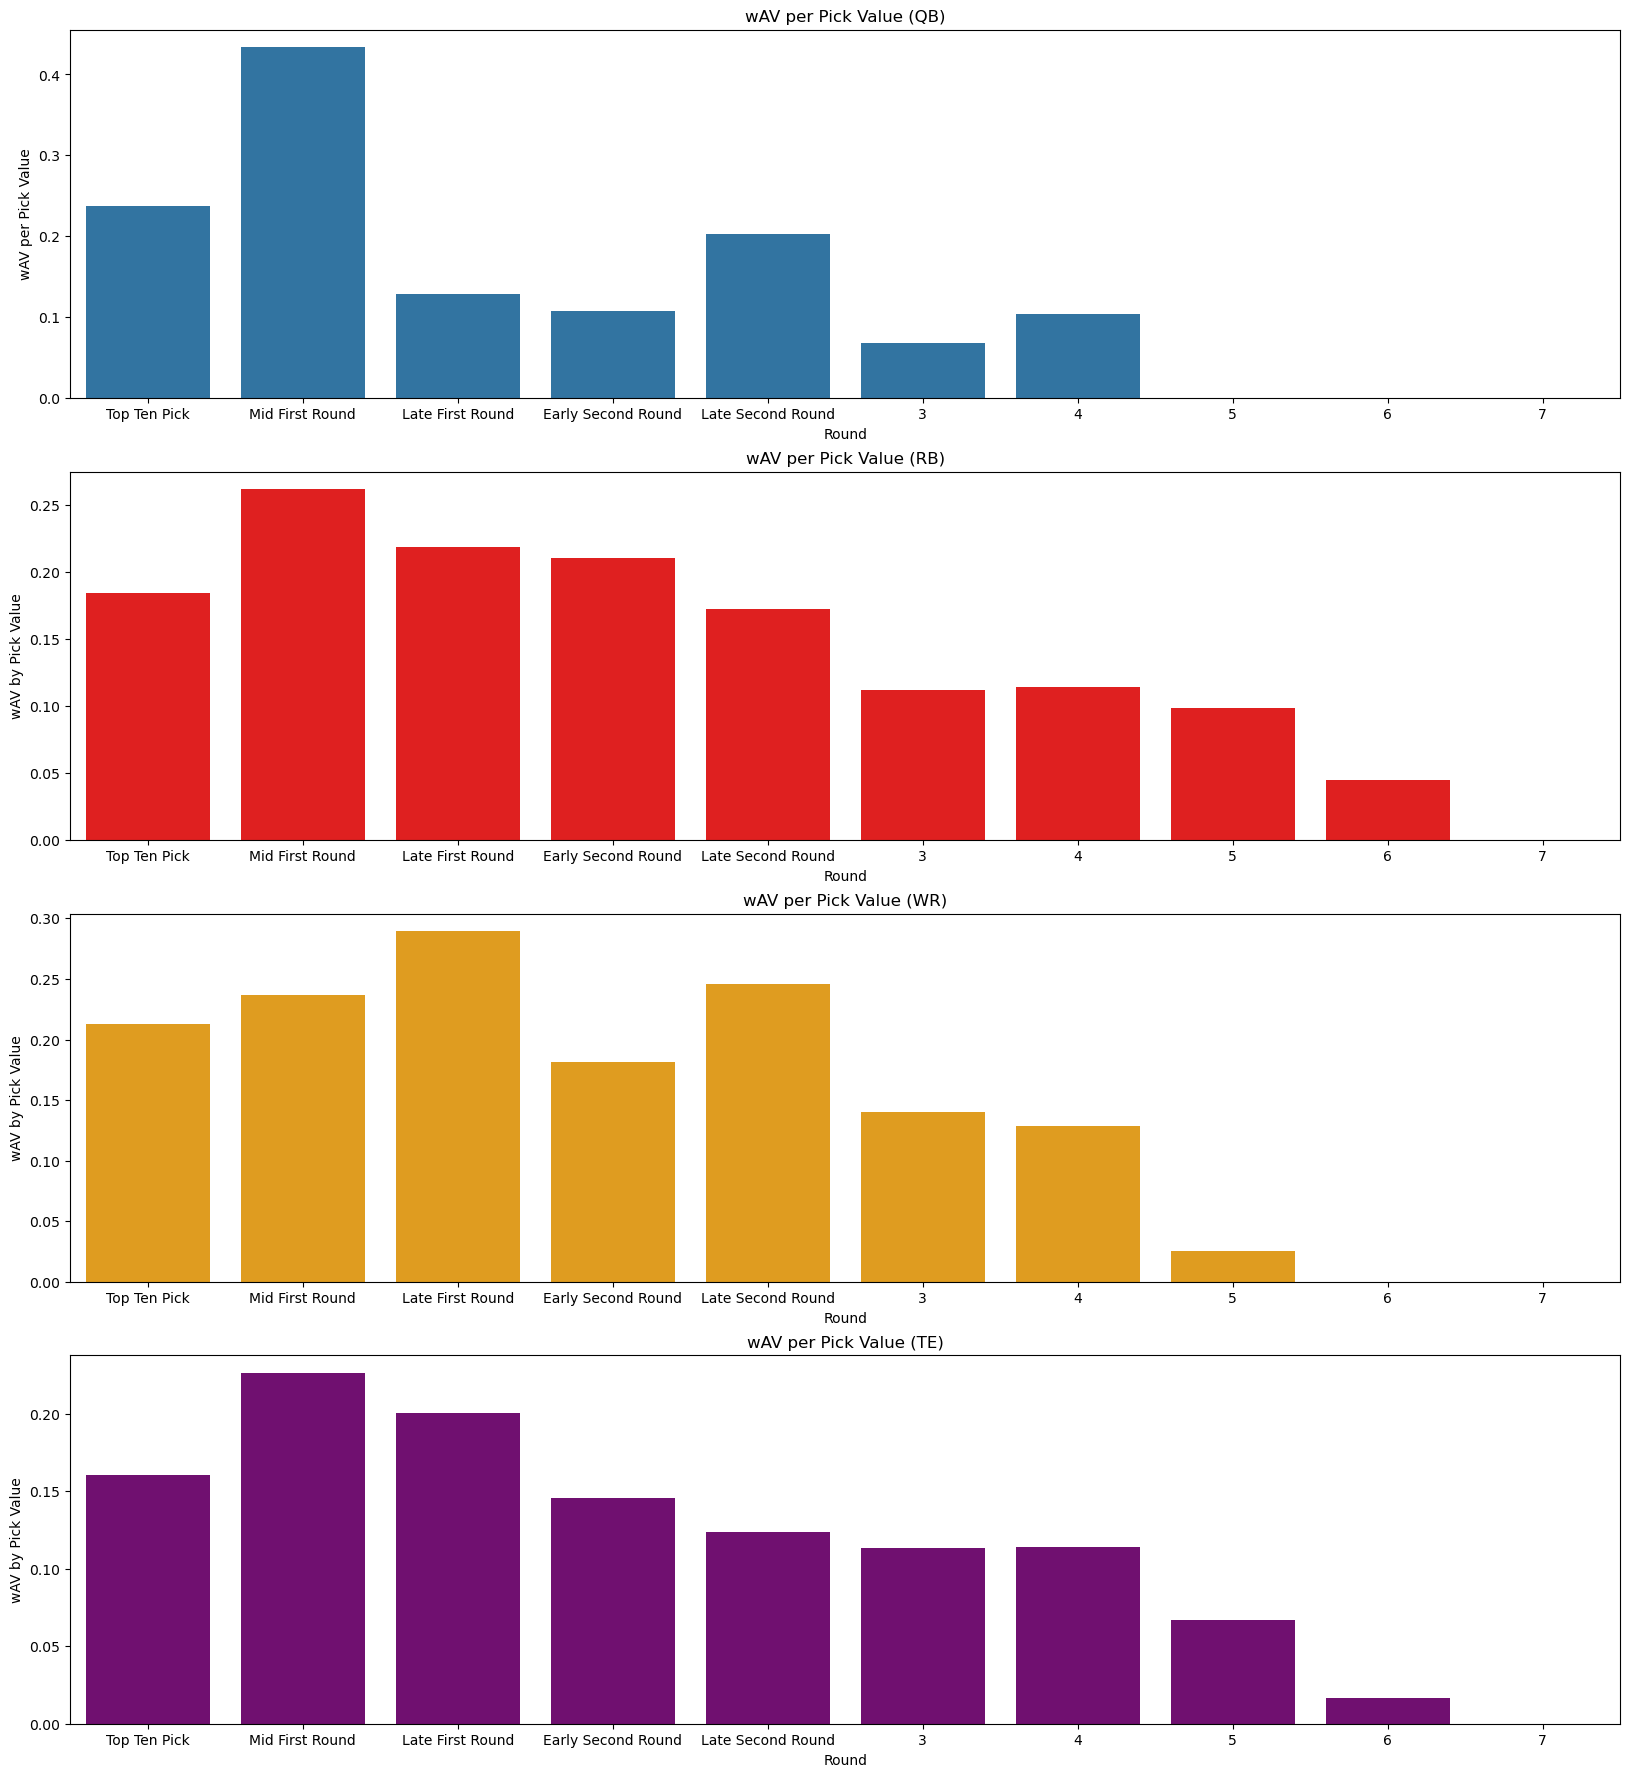

In [24]:
### creating charts for every position
### tried boxplot, but extreme outliers made observations harder to visualize
fig = plt.figure(figsize = (20,22))
# QB
ax1 = fig.add_subplot(4,1,1)
ax1 = sns.barplot(data = positions['QB'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False));
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV per Pick Value")
ax1 = plt.title("wAV per Pick Value (QB)")
# RB
ax2 = fig.add_subplot(4,1,2)
ax2 = sns.barplot(data = positions['RB'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'red');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("wAV per Pick Value (RB)")
# WR
ax3 = fig.add_subplot(4,1,3)
ax3 = sns.barplot(data = positions['WR'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'orange');
ax3 = plt.xlabel("Round")
ax3 = plt.ylabel("wAV by Pick Value")
ax3 = plt.title("wAV per Pick Value (WR)")
# TE
ax4 = fig.add_subplot(4,1,4)
ax4 = sns.barplot(data = positions['TE'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'purple');
ax4 = plt.xlabel("Round")
ax4 = plt.ylabel("wAV by Pick Value")
ax4 = plt.title("wAV per Pick Value (TE)")

### Gonna have to split them up because the graphs are too big to show consecutively, made the display messy
### They need to be this big or else the x-axis labels overlap with eachother
# Leave this one as Offensive Skill Positions



#### QBs that are drafted after the mid first round tend to be significantly worse. As for the other skill positions, they max out in wAV by Pick Value in either the Mid or Late First Round before slowly losing their value. TE seem to be the least valuable in terms of wAV by Pick Value overall, with all values being less than 0.25. However, maybe this is a result of the system they were drafted into which doesn't utilize TE often. Maybe if your offense is built around the TE position, these results would be different. Will look into how QBs taken in the Early and Mid First Round compare to other positions taken there later on.

# Bar Graphs of Meidan wAV by Pick Value of O-Lineman

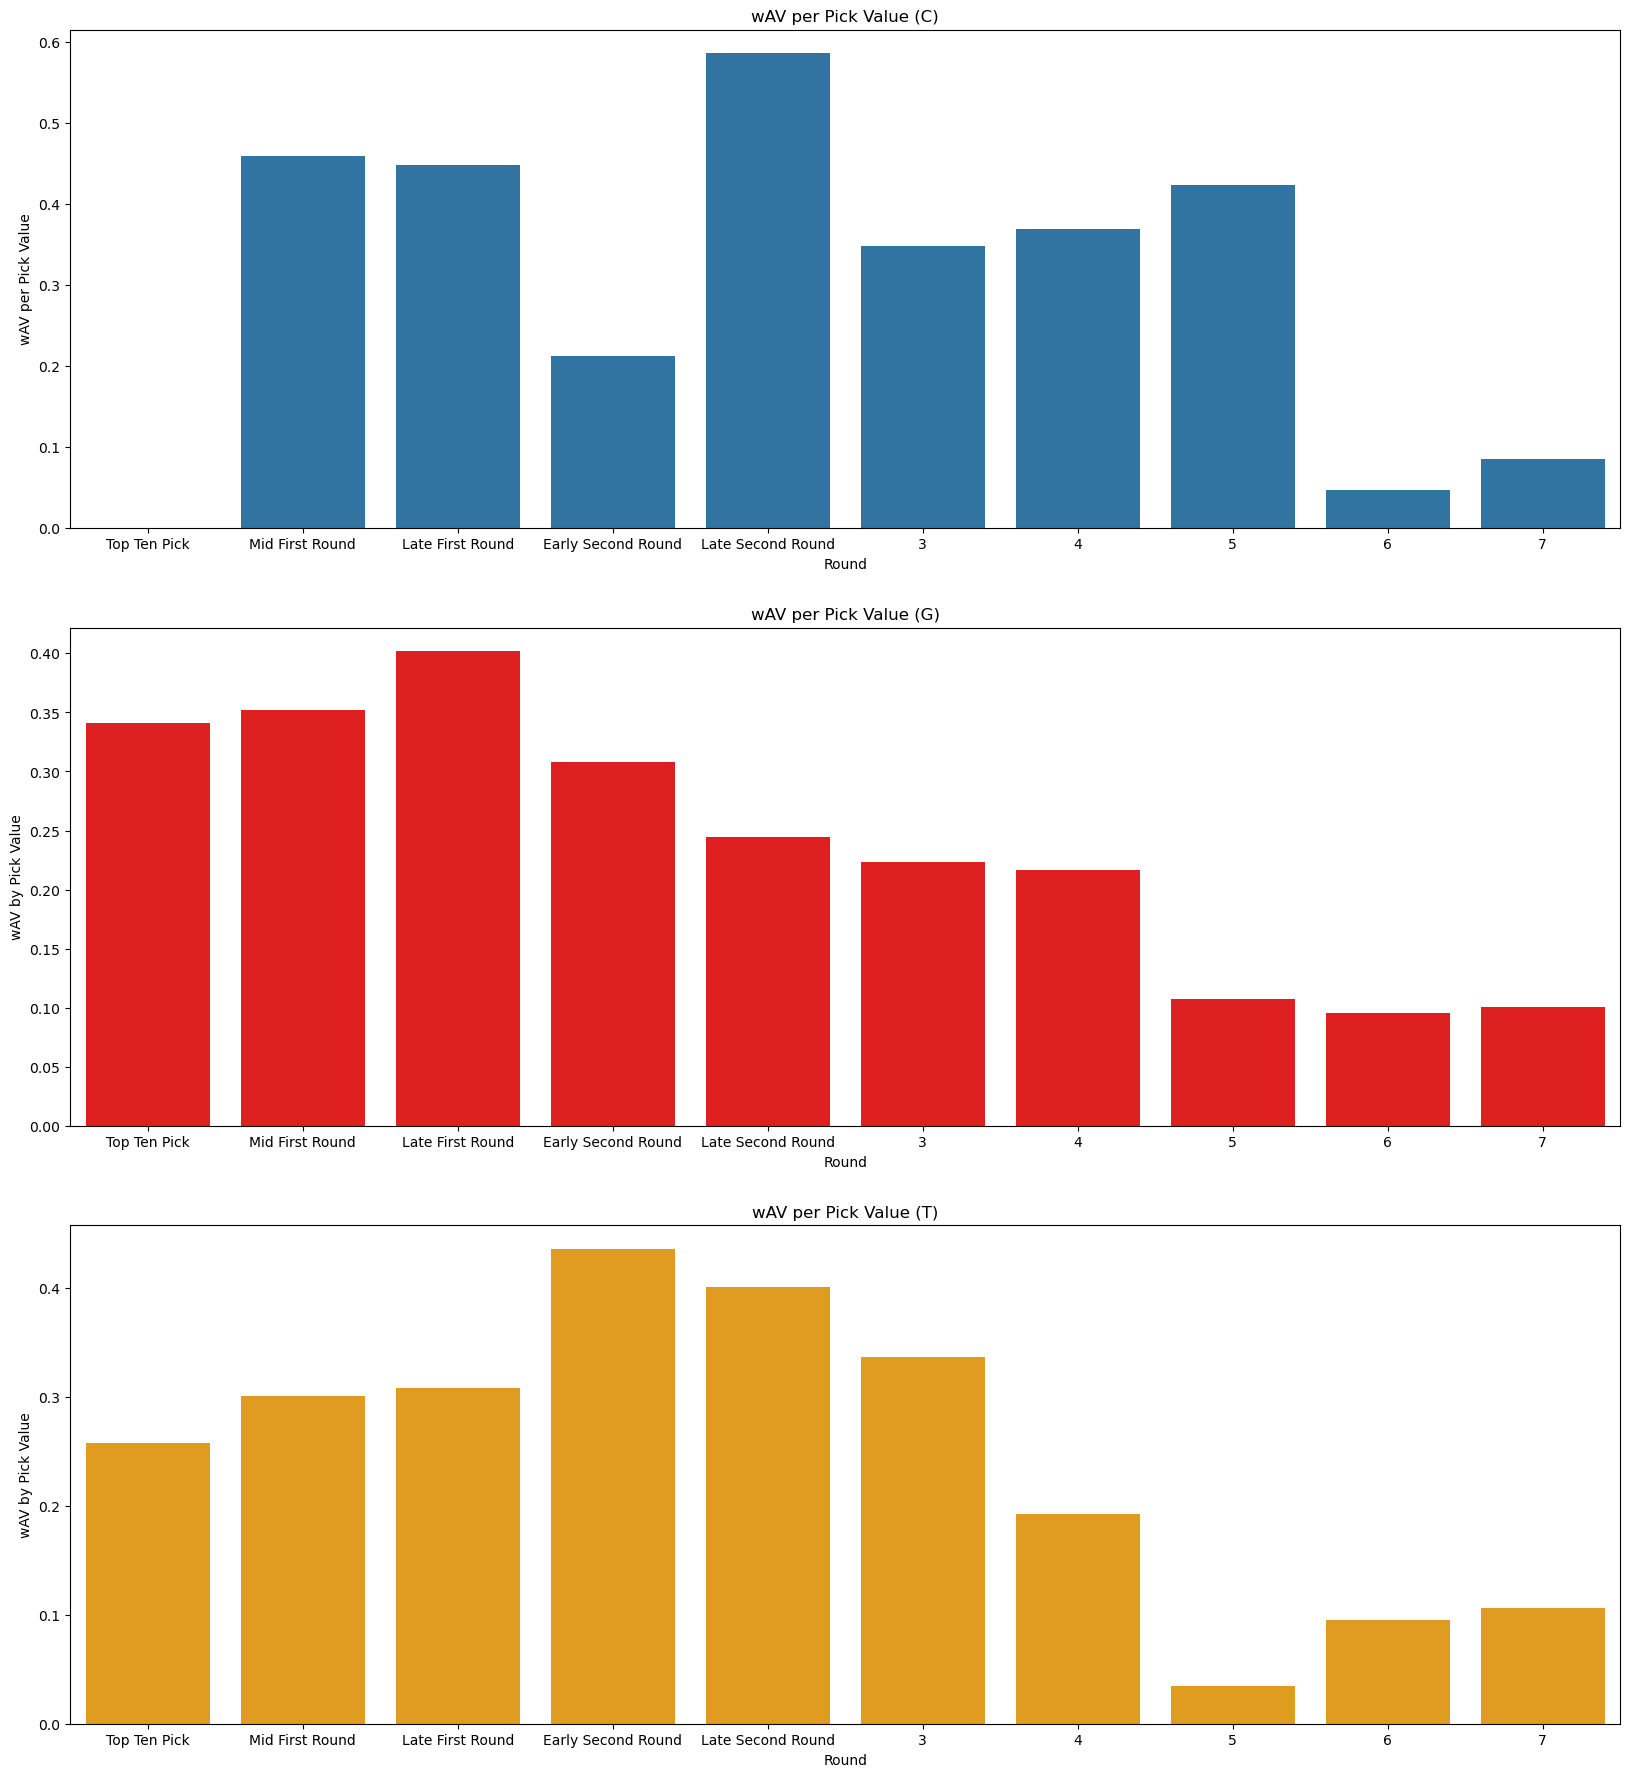

In [25]:
### O-Lineman
fig = plt.figure(figsize = (20,22))
# Center
ax1 = fig.add_subplot(3,1,1)
ax1 = sns.barplot(data = positions['C'], x = "round_type", y = "w_av/dv",
                 estimator = np.median, errorbar = ('ci', False));
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV per Pick Value")
ax1 = plt.title("wAV per Pick Value (C)")
# Guard
ax2 = fig.add_subplot(3,1,2)
ax2 = sns.barplot(data = positions['G'], x = "round_type", y = "w_av/dv",
                  estimator = np.median, errorbar = ('ci', False), color = 'red');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("wAV per Pick Value (G)")
# Tackle
ax3 = fig.add_subplot(3,1,3)
ax3 = sns.barplot(data = positions['T'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'orange');
ax3 = plt.xlabel("Round")
ax3 = plt.ylabel("wAV by Pick Value")
ax3 = plt.title("wAV per Pick Value (T)")

#### Centers seem to yield the most wAV by Pick Value than the other OL positions, and interestingly enough looks roughly uniform from the mid-first round to the 5th round (except for the sharp decrease in the Early Second Round). Guards, on the other hand, all look to maximize their value in the first round, then incrementally decrease in value as it gets later in the draft. Tackles seem to be the most valuable in the second and 3rd rounds of the draft. 

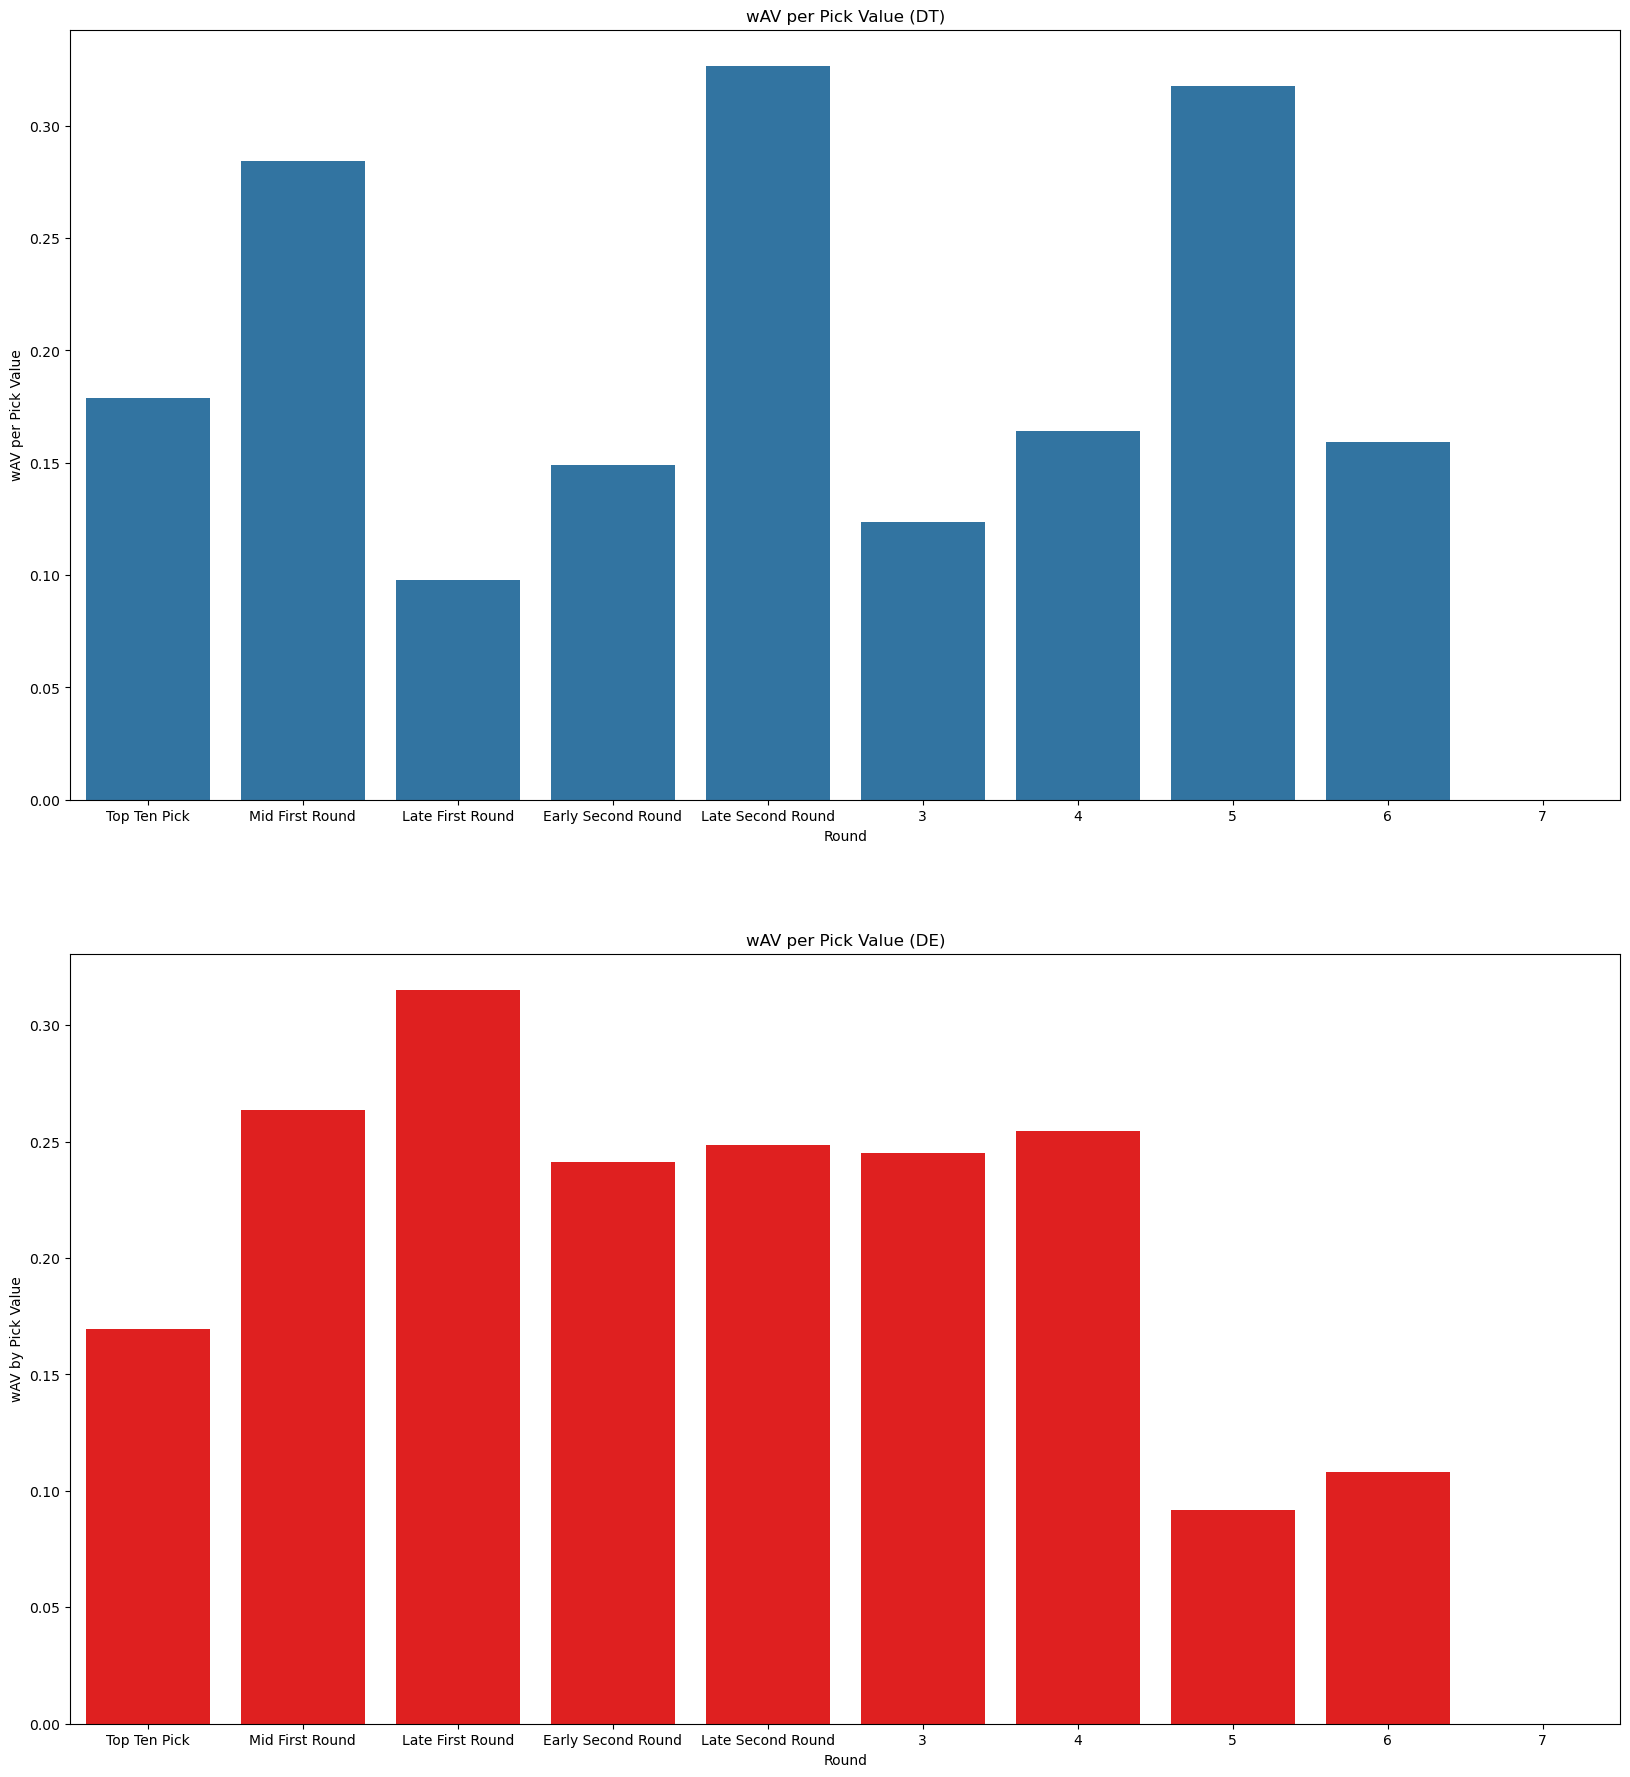

In [26]:
### Defensive Lineman ###
fig = plt.figure(figsize = (20,22))
# DT
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.barplot(data = positions['DT'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False));
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV per Pick Value")
ax1 = plt.title("wAV per Pick Value (DT)")
# DE
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(data = positions['DE'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'red');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("wAV per Pick Value (DE)")

#### The DT graph is interesting because it doesn't show any clear patterns of where a DT is most valuable and where it starts to become less valuable. However, it looks like teams who select DT in the mid first, late second, and fifth rounds profit the most from their selections. DE on the other hand, show to be the most valuable when selected in the late first round. However, those selected in the mid first as well as the second to fourth rounds show similar value. Thus, you should be ok to take a DE at any time before the 5th round.

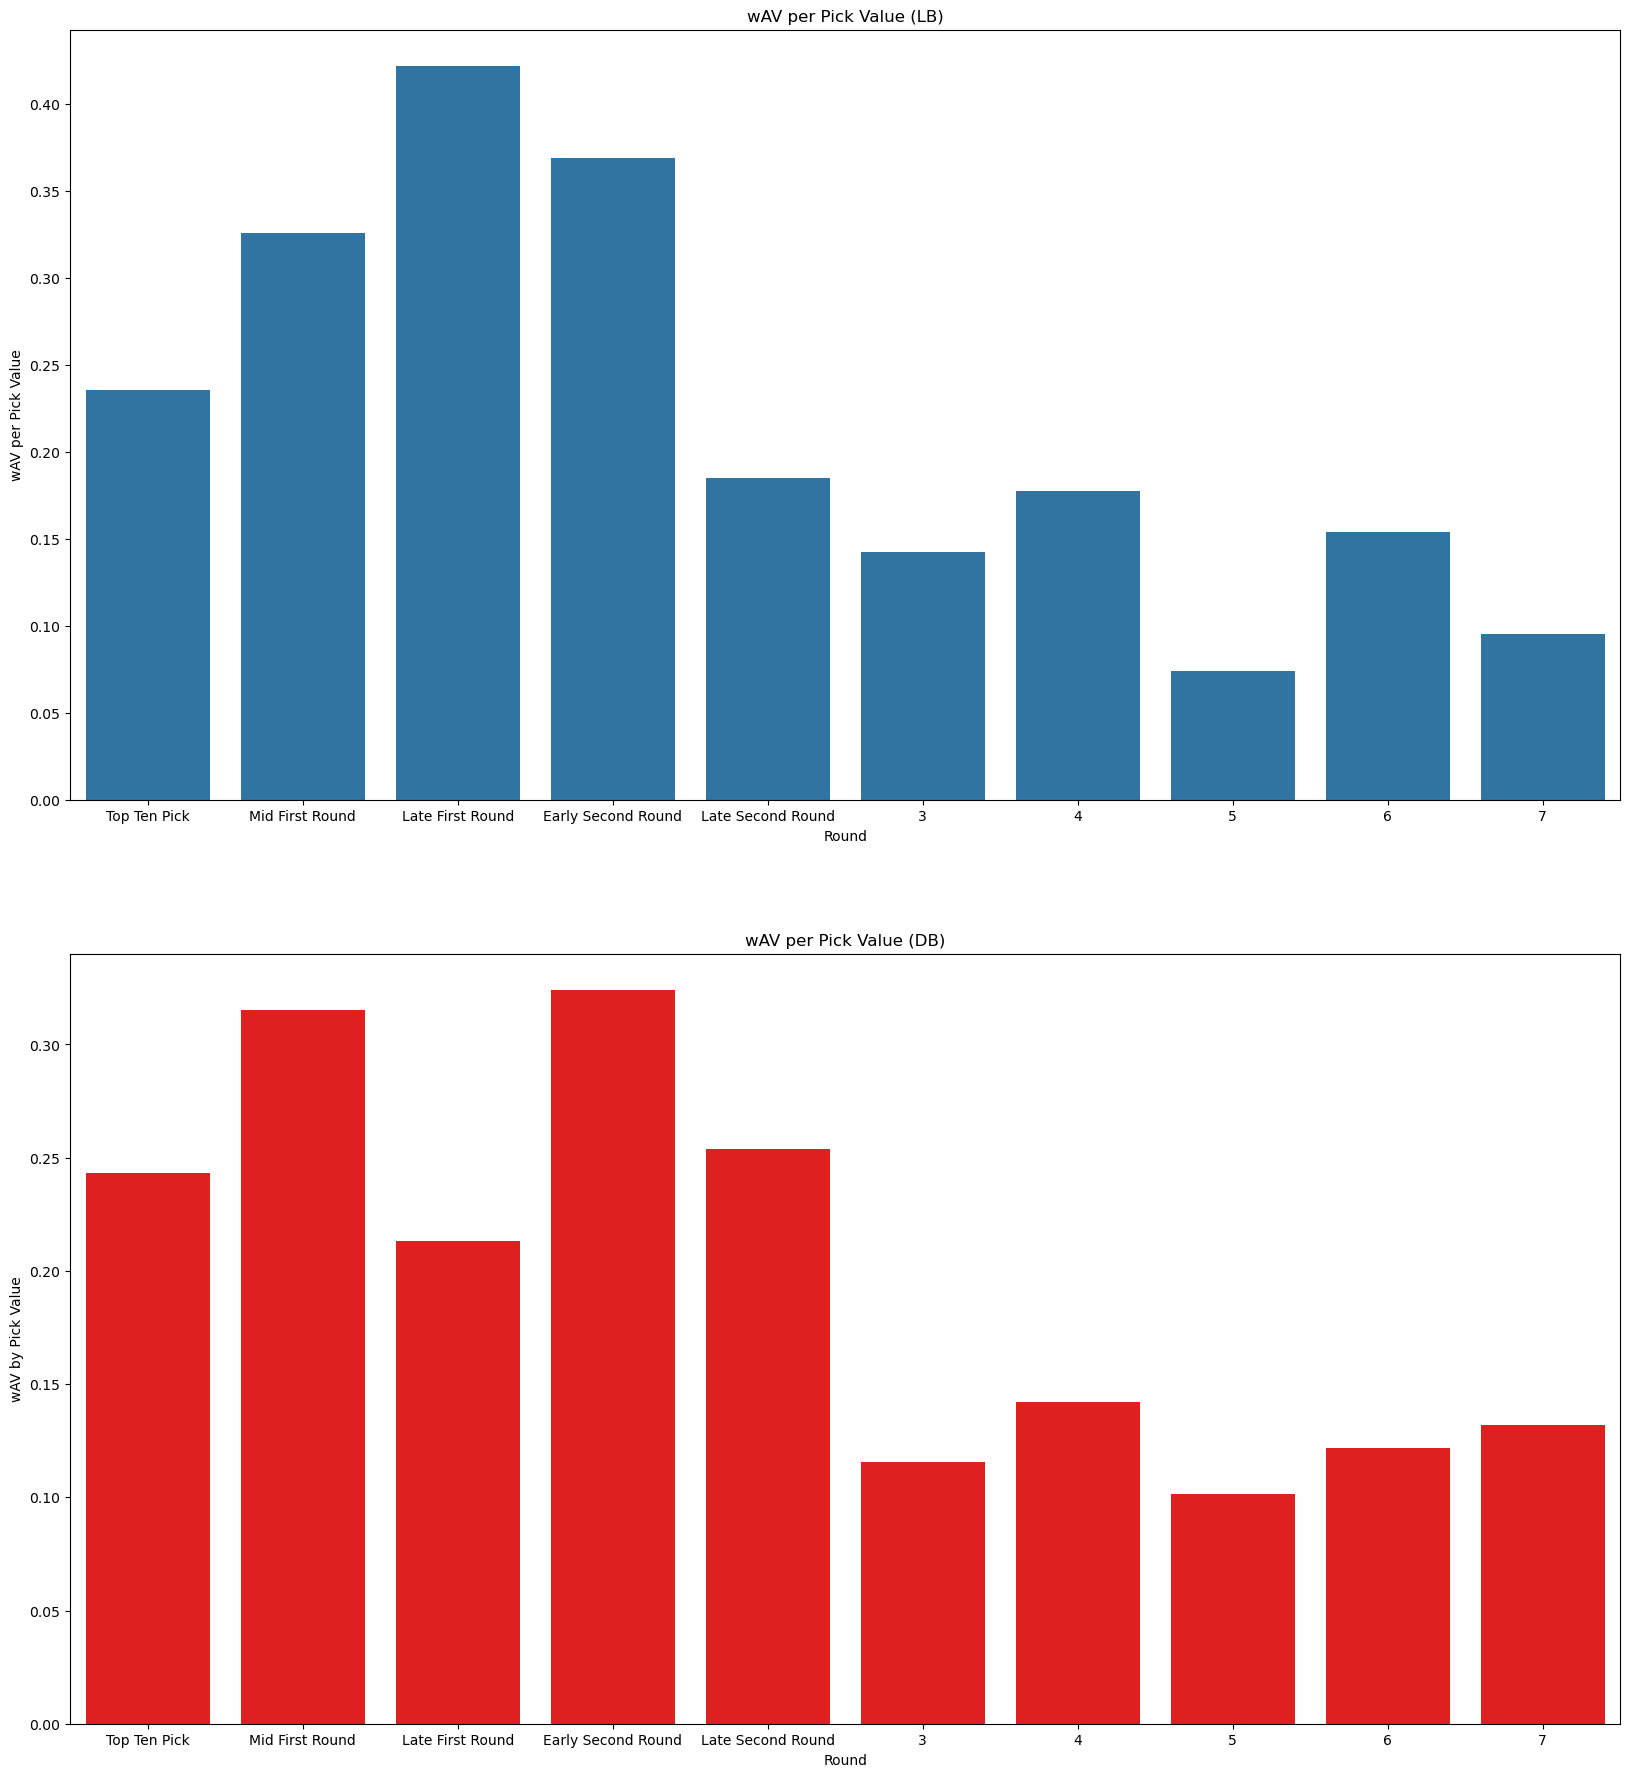

In [27]:
### LB & DB ###
fig = plt.figure(figsize = (20,22))
# LB
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.barplot(data = positions['LB'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False));
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV per Pick Value")
ax1 = plt.title("wAV per Pick Value (LB)")
# DB
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(data = positions['DB'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'red');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("wAV per Pick Value (DB)")

#### LB taken after the Early Second Round are significantly less valuable. If you need a linebacker, it is highly suggested you take them before then. DB seem to peak in the Early Second Round before decreasing and plateuing after the 3rd round. However, they still seem to be serviceable if taken at that point, unlike some other positions, perhaps because so many CBs are used constantly in a game. However, one intersting thing about DB is that they still seem to be fairly serviceable when picked in the 7th round. Perhaps if you need a DB with speed and high upside, picking him in the 7th round could be a beneficial choice for a team. 

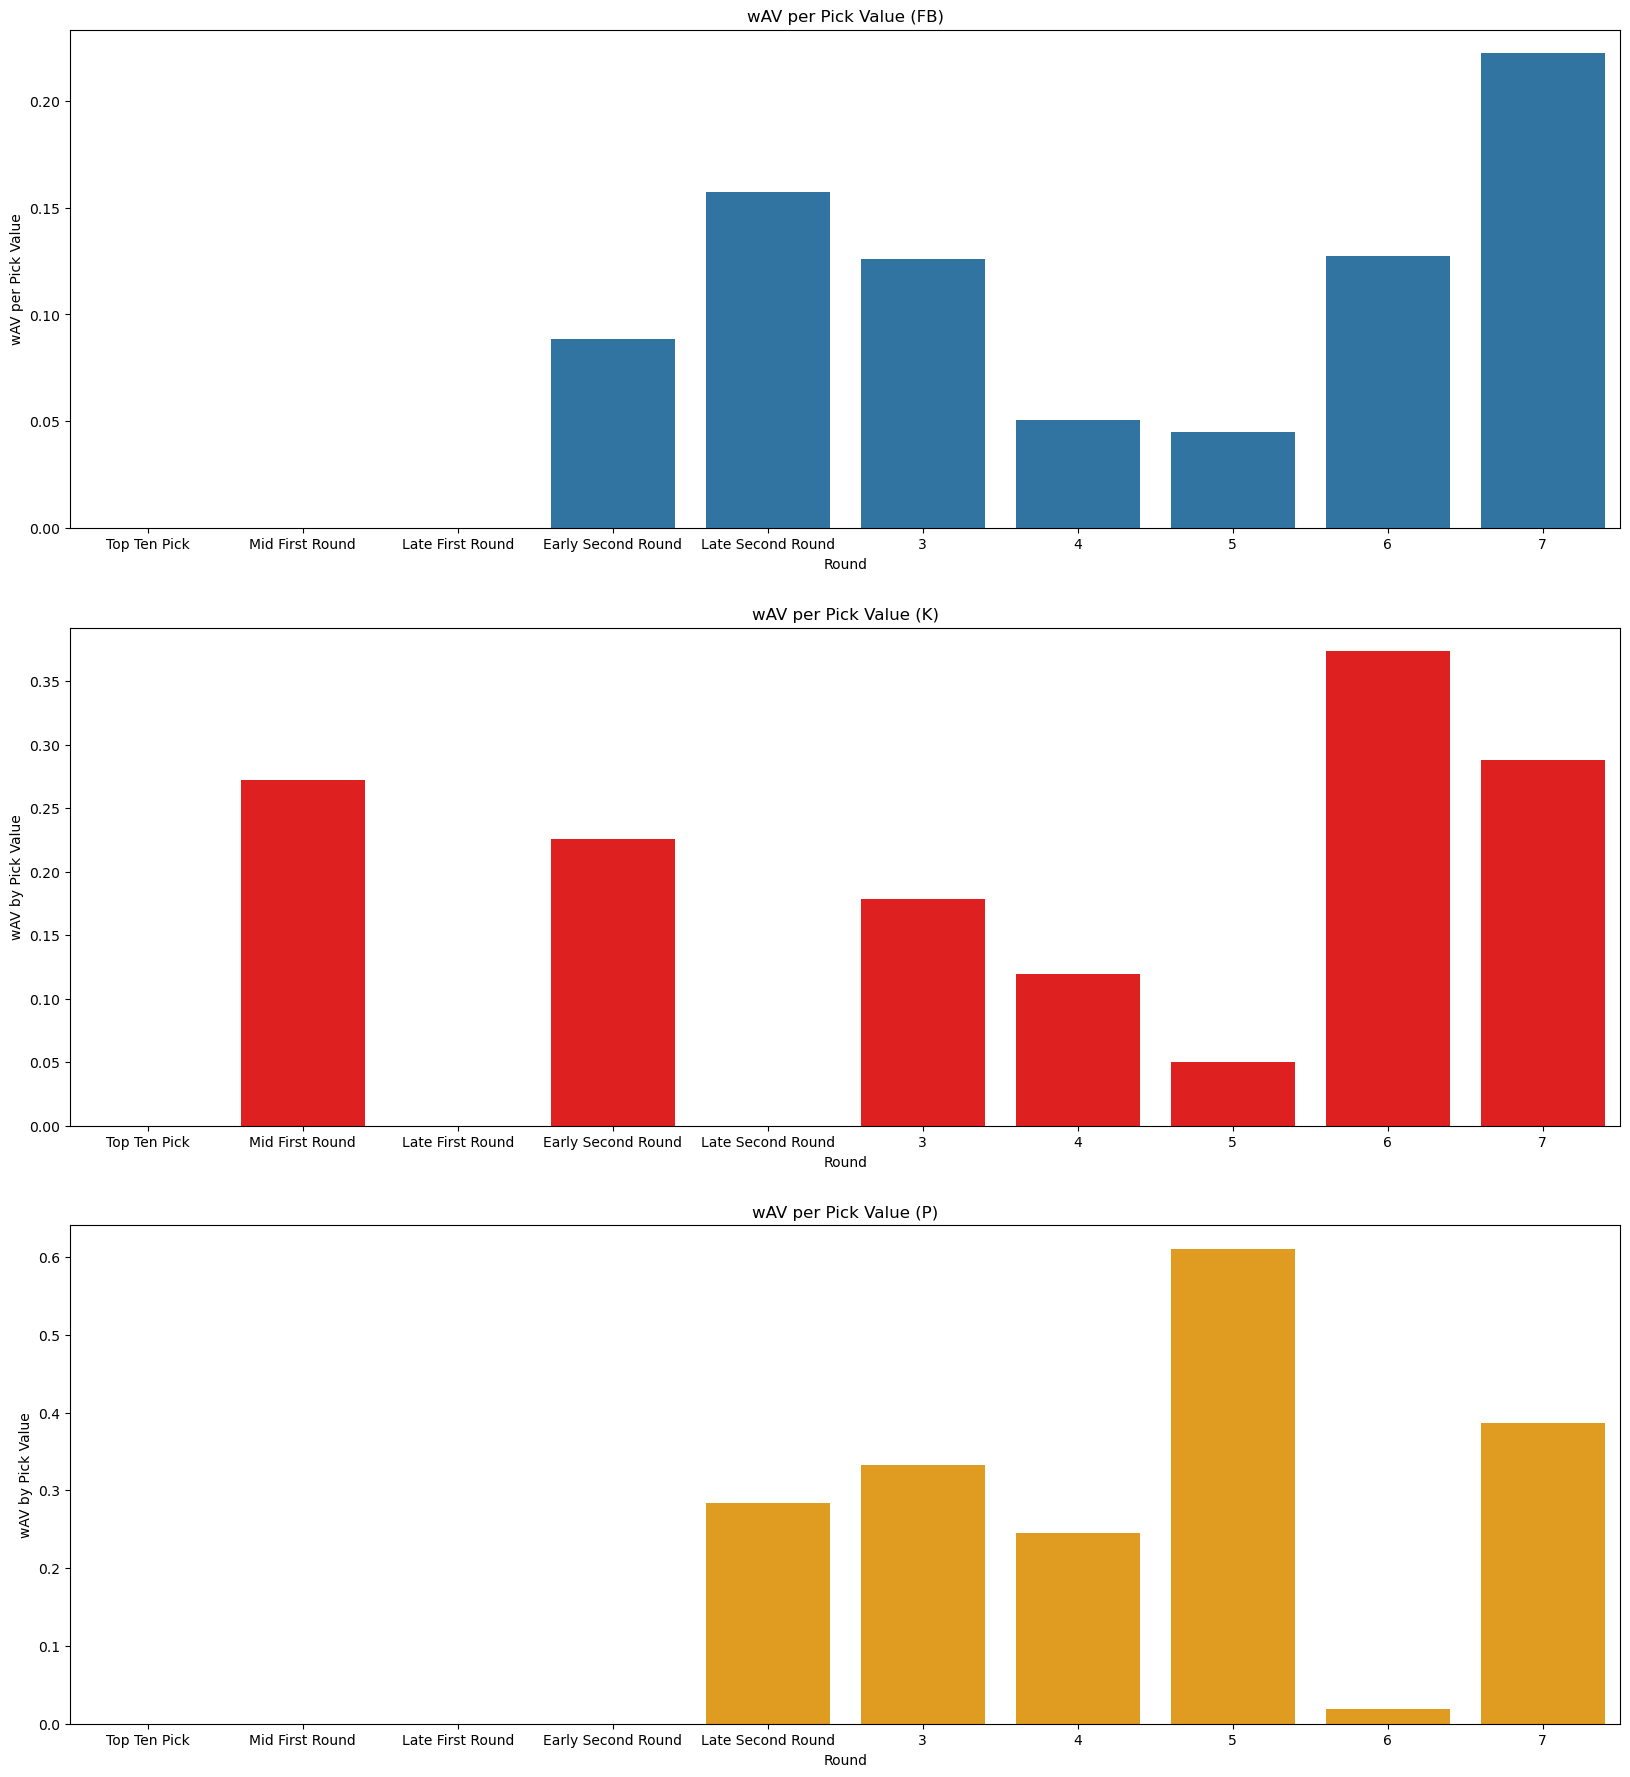

In [28]:
### Auxiliary: FB, K, P ###
fig = plt.figure(figsize = (20,22))
# FB
ax1 = fig.add_subplot(3,1,1)
ax1 = sns.barplot(data = positions['FB'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False));
ax1 = plt.xlabel("Round")
ax1 = plt.ylabel("wAV per Pick Value")
ax1 = plt.title("wAV per Pick Value (FB)")
ax2 = fig.add_subplot(3,1,2)
ax2 = sns.barplot(data = positions['K'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'red');
ax2 = plt.xlabel("Round")
ax2 = plt.ylabel("wAV by Pick Value")
ax2 = plt.title("wAV per Pick Value (K)")
ax3 = fig.add_subplot(3,1,3)
ax3 = sns.barplot(data = positions['P'], x = "round_type", y = "w_av/dv", 
                  estimator = np.median, errorbar = ('ci', False), color = 'orange');
ax3 = plt.xlabel("Round")
ax3 = plt.ylabel("wAV by Pick Value")
ax3 = plt.title("wAV per Pick Value (P)")

#### Not surprisingly, all these positions max out in value in the later rounds of the draft. No one really uses a fullback anymore, and the K and P positions are so flooded and replaceable that it doesn't really make sense to waste a draft pick on them. That being said, if you have all your needs met and you want to put a flyer out for one of these positions, they could make a good fifth, sixth, or seventh round pick to bolster the final roster.

# Boxplot of Early and Mid First Round Picks

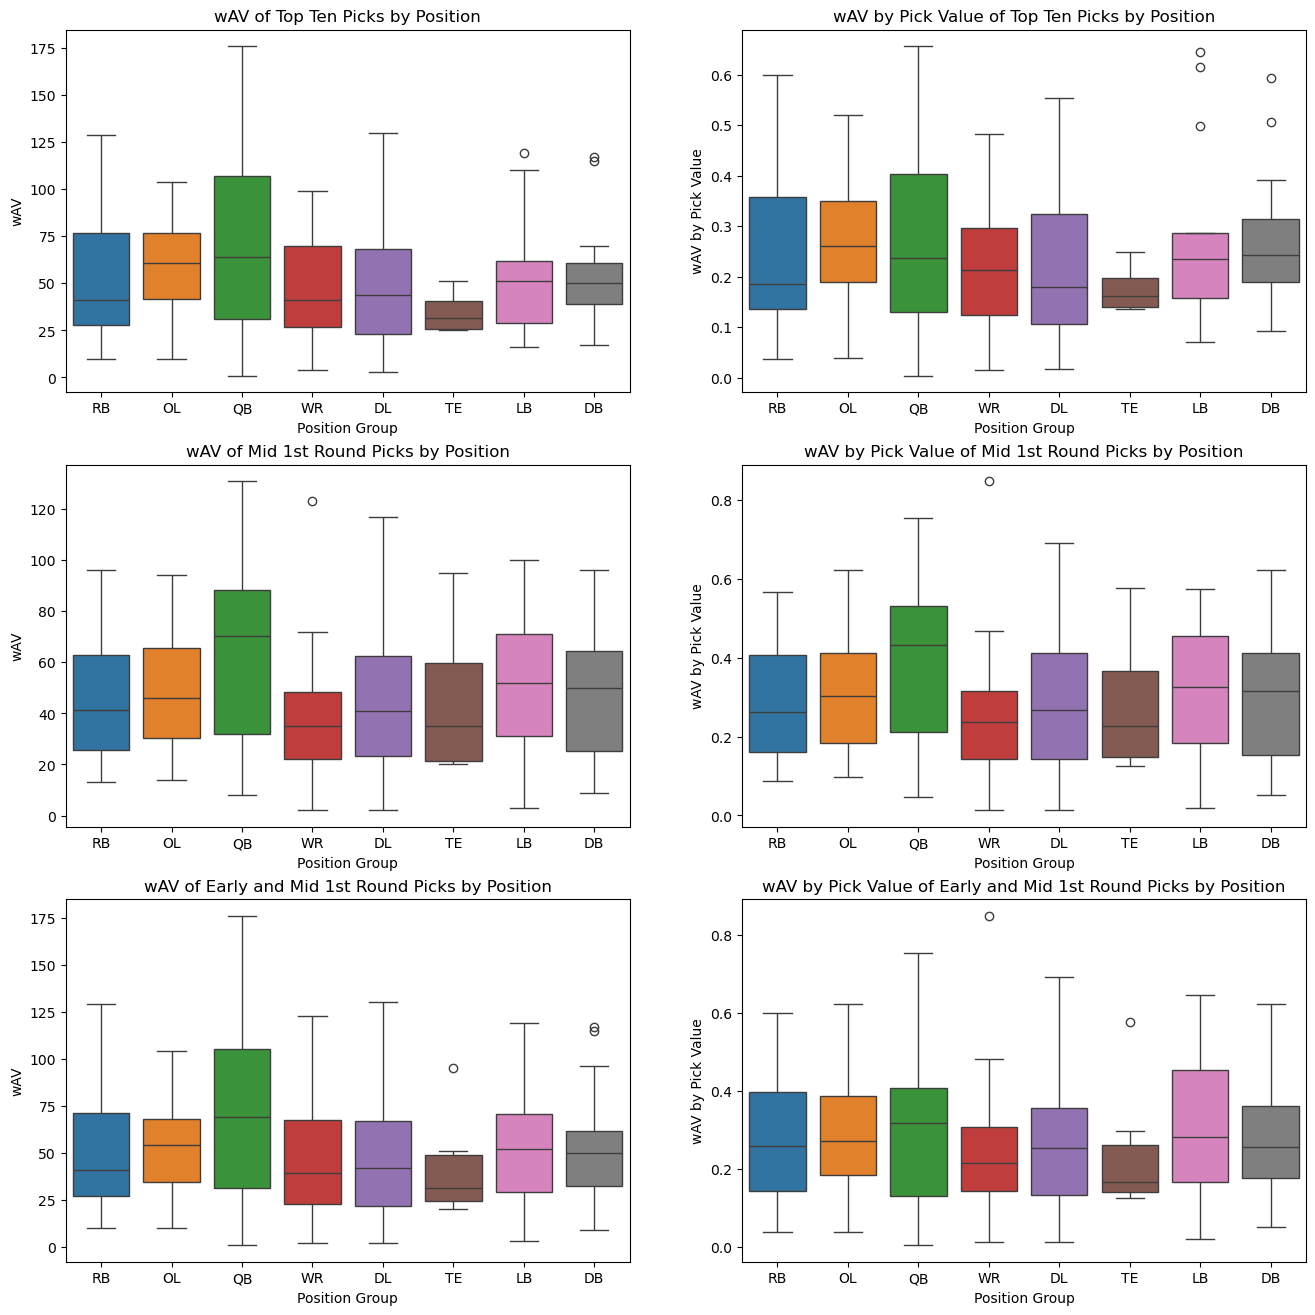

In [29]:
#So each position shows up in the same order in each graph
draft_picks['category'] = pd.Categorical(draft_picks['category'], categories= ['RB', 'OL', 'QB', 'WR', 'DL', 'TE',
                                                                              'LB', 'DB'], ordered=True)


fig = plt.figure(figsize = (16,16))

ax1 = fig.add_subplot(3,2,1)
ax1 = sns.boxplot(data = draft_picks[draft_picks['round_type'] == "Top Ten Pick"],x = "category",
                  y = draft_picks['w_av'], 
                  hue = "category", legend = None);
ax1 = plt.xlabel("Position Group")
ax1= plt.ylabel('wAV');
ax1 = plt.title("wAV of Top Ten Picks by Position")

ax2 = fig.add_subplot(3,2,2)
ax2 = sns.boxplot(data = draft_picks[draft_picks['round_type'] == "Top Ten Pick"],
                  x = "category", y = draft_picks['w_av/dv'], 
                  hue = "category", legend = None);
ax2 = plt.xlabel("Position Group")
ax2 = plt.ylabel('wAV by Pick Value');
ax2 = plt.title('wAV by Pick Value of Top Ten Picks by Position')

ax3 = fig.add_subplot(3,2,3)
ax3 = sns.boxplot(data = draft_picks[draft_picks['round_type'] == "Mid First Round"],x = "category",
                  y = draft_picks['w_av'], 
                  hue = "category", legend = None);
ax3 = plt.xlabel("Position Group")
ax3 = plt.ylabel('wAV');
ax3 = plt.title("wAV of Mid 1st Round Picks by Position")

ax4 = fig.add_subplot(3,2,4)
ax4 = sns.boxplot(data = draft_picks[draft_picks['round_type'] == "Mid First Round"],
                  x = "category", y = draft_picks['w_av/dv'], 
                  hue = "category", legend = None);
ax4 = plt.xlabel("Position Group")
ax4 = plt.ylabel('wAV by Pick Value');
ax4 = plt.title("wAV by Pick Value of Mid 1st Round Picks by Position")

ax5 = fig.add_subplot(3,2,5)
ax5 = sns.boxplot(data = draft_picks[(draft_picks['round_type'] == "Top Ten Pick") | 
                                     (draft_picks['round_type'] == "Mid First Round")],x = "category",
                  y = draft_picks['w_av'], 
                  hue = "category", legend = None);
ax5 = plt.xlabel("Position Group")
ax5 = plt.ylabel('wAV');
ax5 = plt.title("wAV of Early and Mid 1st Round Picks by Position")

ax6 = fig.add_subplot(3,2,6)
ax6 = sns.boxplot(data = draft_picks[(draft_picks['round_type'] == "Top Ten Pick") | 
                                     (draft_picks['round_type'] == "Mid First Round")],
                  x = "category", y = draft_picks['w_av/dv'], 
                  hue = "category", legend = None);
ax6 = plt.xlabel("Position Group")
ax6 = plt.ylabel('wAV by Pick Value');
ax6 = plt.title("wAV by Pick Value of Early and Mid 1st Round Picks by Position")


### QBs taken in the Early and Mid First Round perform better than any other position both in total accumulated wAV and wAV by Pick Value. The median wAV and wAV by Pick Value may be similary to other positions in the top ten picks of the draft, but the upper whiskers show that there's much more possible upside to drafting a quarterback that high than any other position. Thus, it makes sense to trade up into the top ten or even mid 1st round if you need a QB, but otherwise seems unnecessary. We can also see that other position groups seem to have similar median wAV and wAV by Pick Value in both the top ten and the mid 1st round. Thus, it would seem beneficial for any team to try to trade back from any top ten pick they have if they feel that they're set at QB and gain extra draft picks for later in the draft. Also, looking at some of the bar graphs above, you could make an argument that most teams would even benefit trading back from their potential mid 1st round pick depending on the position they need most. 